In [1]:
# -*- coding: utf-8 -*-
"""
Created on Thu Jul  4 15:07:45 2024

@author: Arran
"""

# __all__ = ['kappavalue']
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.cbook as cbook
import matplotlib.colors as colors
import astropy.units as u
from astropy.coordinates import SkyCoord, SpectralCoord
from astropy.wcs.utils import wcs_to_celestial_frame
import eispac

from astropy.visualization import astropy_mpl_style
from astropy.io import fits


#importing tools to define a kappa fit
from numpy import exp, linspace, random
from scipy.optimize import curve_fit

plt.style.use(astropy_mpl_style)

In [2]:
#define kappavalue to read into fittingfunctions.py
# kappavalue = 1

###Template parser to parse template data values and pass into fitting functions###
def templateparser(tmplt):
    pvallst = []
    plimslst = []
    pltdlst = []
    for i in range(len(tmplt.parinfo)):
        pvallst.append(tmplt.parinfo[i]['value'])
        pltdlst.append(tmplt.parinfo[i]['limited'])
        plimslst.append(tmplt.parinfo[i]['limits'])
        
    return pvallst, plimslst, pltdlst

###Defining the Kappa distribution function for fitting### 
def kappafunc(x, amp, cen, wid, kappa):
    #defining the variance-like variable indicated in Jeffreys. N. S et al (2016)
    variance_k = wid * (1 - 3/(2*kappa))
    #argument used in kappa function 
    arg = (1 + ((x - cen)**2)/(2 * (variance_k**2) * kappa))
    
    return amp * (arg) ** (-1 *kappa)

###defining kappafit for scipy curvefit###
#last arg for defining initial kappa guess when calling in the func
def kfitter(x, y, tmplt, kappinit):
    #parameter values
    pval = templateparser(tmplt)[0]
    #parameter limits
    plims = templateparser(tmplt)[1]
    #initial values for curve fits, inital kappa guess at end
    init_val = [pval[0], pval[1], pval[2], kappinit]
    
    #bounds=([0., plims[1][0] ,plims[2][0], 0.], [1e100, plims[1][1], plims[2][1], 1000])
    
    #original curvefit vals w/ bounds
    best_vals, covar = curve_fit(kappafunc, x, y, p0=init_val, bounds=([0., plims[1][0] ,plims[2][0], 0.], [1e100, plims[1][1], plims[2][1], 1000]))
    
    return best_vals, covar

In [3]:
if __name__ == '__main__':
    # Read in the fit template and EIS observation
    # data_filepath = './eis_20170906_120233.data.h5'
    # data_filepath = './data_eis/eis_20170906_114820.data.h5'
    data_filepath = './data_eis/eis_20170906_090025.data.h5'
    
    
    
    #testing template fitting for both lines
    
    # tmplt = eispac.EISFitTemplate(value=[ 19253.7287, 262.9824, 0.0341, 118.9812, 1601.5393,263.7539,0.0649, 342.9053], line_ids=['Fe XVI 262.984', 'Fe XXIII 263.760' ], wmin=262.78399658203125, wmax= 263.96002197265625)

    #original tmplt fit
    template_filepath1 = './fe_16_262_984.1c.template.h5'
    template_filepath2 = './fe_23_263_760.1c.template.h5'
    

In [4]:
    tmplt1 = eispac.read_template(template_filepath1)
    
    # #establishing new updated template for kappa parameter
    pvals1 = templateparser(tmplt1)[0]
    plims1 = templateparser(tmplt1)[1]
    pltd1 = templateparser(tmplt1)[2]
    new_tmplt1 = eispac.EISFitTemplate(value=[pvals1[0],pvals1[1], pvals1[2],pvals1[3], 1000], 
                                        limits = [[0.0000, 0.0000],[plims1[1][0], plims1[1][1]],[plims1[2][0], plims1[2][1]], [plims1[3][0], plims1[3][1]], [0, 1000]],
                                        limited = [[pltd1[0][0],pltd1[0][1]], [pltd1[1][0],pltd1[1][1]], [pltd1[2][0],pltd1[2][1]], [pltd1[3][0],pltd1[3][1]], [1,1]], 
                                        line_ids=['Fe XVI 262.984'], 
                                        wmin= 262.78399658203125, wmax=263.1000061035156)
    print(new_tmplt1)
    
    
    tmplt2 = eispac.read_template(template_filepath2)
    
    
    pvals2 = templateparser(tmplt2)[0]
    plims2 = templateparser(tmplt2)[1]
    pltd2 = templateparser(tmplt2)[2]
    new_tmplt2 = eispac.EISFitTemplate(value=[pvals2[0],pvals2[1], pvals2[2],pvals2[3], 1000], 
                                        limits = [[0.0000, 0.0000],[plims2[1][0], plims2[1][1]],[plims2[2][0], plims2[2][1]],[plims2[3][0], plims2[3][1]], [0, 1000]], 
                                        limited = [[pltd2[0][0],pltd2[0][1]], [pltd2[1][0],pltd2[1][1]], [pltd2[2][0],pltd2[2][1]], [pltd2[3][0],pltd2[3][1]], [1,1]],
                                        line_ids=['Fe XXIII 263.760'], 
                                        wmin= 263.45001220703125, wmax=263.96002197265625)
    
    print(new_tmplt2)
    
    

length of params 4
{'line_ids': ['Fe XVI 262.984']}
{'line_ids': ['Fe XVI 262.984'], 'wmin': 262.78399658203125}
{'line_ids': ['Fe XVI 262.984'], 'wmin': 262.78399658203125, 'wmax': 263.1000061035156}
length of params 5
--- EISFitTemplate SUMMARY ---
filename_temp: unknown_file
n_gauss: 1
n_poly: 2
line_ids: ['Fe XVI 262.984']
wmin, wmax: 262.78399658203125, 263.1000061035156
kappavalue: 10

--- PARAMETER CONSTRAINTS ---
   *            Value   Fixed     Limited              Limits                Tied
  p[0]     19253.7287       0     1     0       0.0000       0.0000                   
  p[1]       262.9824       0     1     1     262.9423     263.0226                   
  p[2]         0.0341       0     1     1       0.0191       0.0510                   
  p[3]       118.9812       0     0     0       0.0000       0.0000                   
  p[4]      1000.0000       0     1     1       0.0000    1000.0000                   
length of params 4
{'line_ids': ['Fe XXIII 263.760']}
{'li

In [5]:

    Gaussdata_cube1 = eispac.read_cube(data_filepath, tmplt1.central_wave)
    data_cube1 = eispac.read_cube(data_filepath, new_tmplt1.central_wave)
    Gaussdata_cube2 = eispac.read_cube(data_filepath, tmplt2.central_wave)
    data_cube2 = eispac.read_cube(data_filepath, new_tmplt2.central_wave)
    

Data file,
   C:\Users\Owner\Documents\Course Material\MSc\Project\CatalogTest\data_eis\data_eis\eis_20170906_090025.data.h5
Header file,
   C:\Users\Owner\Documents\Course Material\MSc\Project\CatalogTest\data_eis\data_eis\eis_20170906_090025.head.h5
Found a wavelength 262.94 [Angstroms] in window 4
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
Data file,
   C:\Users\Owner\Documents\Course Material\MSc\Project\CatalogTest\data_eis\data_eis\eis_20170906_090025.data.h5
Header file,
   C:\Users\Owner\Documents\Course Material\MSc\Project\CatalogTest\data_eis\data_eis\eis_20170906_090025.head.h5
Found a wavelength 262.94 [Angstroms] in window 4
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
Data file,
   C:\Users\Owner\Documents\Course Material\MSc\Project\CatalogTest\data_eis\data_eis\eis_20170906_090025.data.h5
Header file,
   C:\Users\Owner\Documents\Course Material\MSc\Project\CatalogTest\data_eis\data_eis\eis_2017

In [6]:
    # Select a cutout of the raster
    eis_frame = wcs_to_celestial_frame(Gaussdata_cube1.wcs)
    print(eis_frame)
    lower_left = [None, SkyCoord(Tx=500, Ty=-200, unit=u.arcsec, frame=eis_frame)]
    print(lower_left)
    upper_right = [None, SkyCoord(Tx=550, Ty=-160, unit=u.arcsec, frame=eis_frame)]
    

<Helioprojective Frame (obstime=None, rsun=695700.0 km, observer=<HeliographicStonyhurst Coordinate (obstime=None, rsun=695700.0 km): (lon, lat, radius) in (deg, deg, m)
    (1.31218856e-14, 7.2475863, 1.50778639e+11)>)>
[None, <SkyCoord (Helioprojective: obstime=None, rsun=695700.0 km, observer=<HeliographicStonyhurst Coordinate (obstime=None, rsun=695700.0 km): (lon, lat, radius) in (deg, deg, m)
    (1.31218856e-14, 7.2475863, 1.50778639e+11)>): (Tx, Ty) in arcsec
    (500., -200.)>]


In [7]:
    
    # #original cutout for cropping
        
    # gauss_cutout1 = Gaussdata_cube1.crop(lower_left, upper_right)
    # gauss_cutout2 = Gaussdata_cube2.crop(lower_left, upper_right)
    
    
    # raster_cutout1 = data_cube1.crop(lower_left, upper_right)
    # raster_cutout2 = data_cube2.crop(lower_left, upper_right)
    
    
    #raster 'cutout' change to entire observation

    gauss_cutout1 = Gaussdata_cube1
    gauss_cutout2 = Gaussdata_cube2
    raster_cutout1 = data_cube1
    raster_cutout2 = data_cube2
    

In [8]:
    # # Fit the data and save it to disk

    # # Gaussian # # 
    fit_gauss1 = eispac.fit_spectra(gauss_cutout1, tmplt1, ncpu='max')
    save_filepathsgauss1 = eispac.save_fit(fit_gauss1, save_dir='cwd')
    
    
    fit_gauss2 = eispac.fit_spectra(gauss_cutout2, tmplt2, ncpu='max')
    save_filepathsgauss2 = eispac.save_fit(fit_gauss2, save_dir='cwd')

length of params 4
 + computing fits for 30 exposures, each with 120 spectra
 + running mpfit on 4 cores (of 4)


Finished computing fits!
   runtime : 0:00:44.018999
   3600 spectra fit without issues
   0 spectra have < 7 good data points
   0 spectra have bad or invalid parameters
Saving EIS fit results...
   Directory: C:\Users\Owner\Documents\Course Material\MSc\Project\CatalogTest\data_eis
   Filenames: eis_20170906_090025.fe_16_262_984.1c-0.fit.h5
length of params 4
 + computing fits for 30 exposures, each with 120 spectra
 + running mpfit on 4 cores (of 4)


Finished computing fits!
   runtime : 0:00:57.059524
   3600 spectra fit without issues
   0 spectra have < 7 good data points
   0 spectra have bad or invalid parameters
Saving EIS fit results...
   Directory: C:\Users\Owner\Documents\Course Material\MSc\Project\CatalogTest\data_eis
   Filenames: eis_20170906_090025.fe_23_263_760.1c-0.fit.h5


In [9]:
    # # Kappa # # 
    fit_res1 = eispac.fit_spectraKAPPA(raster_cutout1, new_tmplt1, ncpu='max')
    save_filepaths1 = eispac.save_fit(fit_res1, save_dir='cwd')
    
    
    fit_res2 = eispac.fit_spectraKAPPA(raster_cutout2, new_tmplt2, ncpu='max')
    save_filepaths2 = eispac.save_fit(fit_res2, save_dir='cwd')

length of params 5
 + computing fits for 30 exposures, each with 120 spectra
 + running mpfit on 4 cores (of 4)


C:\Users\Owner\anaconda3\Lib\site-packages\eispac\core\fit_spectraKAPPA.py:428: RuntimeWarning: invalid value encountered in divide
  rel_err = obs_errs/obs_cent




Finished computing fits!
   runtime : 0:01:36.013278
   3526 spectra fit without issues
   0 spectra have < 7 good data points
   74 spectra have bad or invalid parameters
Saving EIS fit results...
   Directory: C:\Users\Owner\Documents\Course Material\MSc\Project\CatalogTest\data_eis
   Filenames: eis_20170906_090025.fe_16_262_984.1c-0.fit.h5
length of params 5
 + computing fits for 30 exposures, each with 120 spectra
 + running mpfit on 4 cores (of 4)


Finished computing fits!
   runtime : 0:02:42.878050
   3439 spectra fit without issues
   0 spectra have < 7 good data points
   161 spectra have bad or invalid parameters
Saving EIS fit results...
   Directory: C:\Users\Owner\Documents\Course Material\MSc\Project\CatalogTest\data_eis
   Filenames: eis_20170906_090025.fe_23_263_760.1c-0.fit.h5


In [10]:
    # # Find indices and world coordinates of max intensity
    

    # sum_data_inten1 = raster_cutout1.sum_spectra().data
    # sum_data_fullregion1 = data_cube1.sum_spectra().data  #use for full region image on subplot?
    # sum_data_inten2 = raster_cutout2.sum_spectra().data
    # sum_data_fullregion2 = data_cube2.sum_spectra().data  #use for full region image on subplot?


    sum_data_inten1 = gauss_cutout1.sum_spectra().data
    sum_data_fullregion1 = Gaussdata_cube1.sum_spectra().data  #use for full region image on subplot?
    sum_data_inten2 = gauss_cutout2.sum_spectra().data
    sum_data_fullregion2 = Gaussdata_cube2.sum_spectra().data  #use for full region image on subplot?

In [11]:
    def worldtoindex(raster, xarc, yarc):
        indexcoord = raster.wcs.world_to_array_index(SpectralCoord(2.627245243818844e-08, unit = u.m ), SkyCoord(Tx=xarc, Ty=yarc, unit=u.arcsec, frame=eis_frame))
        iy, ix = indexcoord[0], indexcoord[1]
        return iy, ix

    # print(worldtoindex(raster_cutout1, 550, -240)[0])
        
    coordx = np.linspace(500,600,20)
    coordy = np.linspace(-260,-160,20)
    


        
        
    # iy, ix = np.unravel_index(sum_data_inten1.argmax(), sum_data_inten1.shape)
    # iy, ix = worldtoindex(gauss_cutout1, 549, -226)[0], worldtoindex(gauss_cutout1, 549, -226)[1]
    # iy, ix = worldtoindex(gauss_cutout1, 565, -210)[0], worldtoindex(gauss_cutout1, 565, -210)[1]
    # iy, ix = worldtoindex(gauss_cutout1, 565, -220)[0], worldtoindex(gauss_cutout1, 565, -220)[1]
    # iy, ix = worldtoindex(gauss_cutout1, 558, -235)[0], worldtoindex(gauss_cutout1, 558, -235)[1]
    # iy, ix = worldtoindex(gauss_cutout1, 530, -160)[0], worldtoindex(gauss_cutout1, 530, -160)[1]
    # iy, ix = worldtoindex(gauss_cutout1, 530, -180)[0], worldtoindex(gauss_cutout1, 530, -180)[1]
    # iy, ix = worldtoindex(gauss_cutout1, 544, -222)[0], worldtoindex(gauss_cutout1, 544, -222)[1]
    iy, ix = worldtoindex(gauss_cutout1, 580, -200)[0], worldtoindex(gauss_cutout1, 580, -200)[1]
    
    worldcoord = gauss_cutout1.wcs.array_index_to_world(iy, ix, 0)
    # indexcoord = raster_cutout1.wcs.world_to_array_index(SpectralCoord(2.627245243818844e-08, unit = u.m ), SkyCoord(Tx=550, Ty=-226, unit=u.arcsec, frame=eis_frame))
    print(iy, ix)
    print(worldcoord)
    # print(indexcoord)
    # iy, ix = np.unravel_index(np.argsort(sum_data_inten1.ravel(), axis=0)[-30], sum_data_inten1.shape)


    ex_world_coords1 = gauss_cutout1.wcs.array_index_to_world(iy, ix, 0)[1]
    print(ex_world_coords1)
    ex_world_coords2 = gauss_cutout2.wcs.array_index_to_world(iy, ix, 0)[1]
    
    
    # y_arcsec1, x_arcsec1 = ex_world_coords1.Ty.value, ex_world_coords1.Tx.value
    # y_arcsec2, x_arcsec2 = ex_world_coords2.Ty.value, ex_world_coords2.Tx.value
    
    y_arcsec, x_arcsec = ex_world_coords1.Ty.value, ex_world_coords1.Tx.value
    
    
    # print(y_arcsec1, y_arcsec2)
    # print(x_arcsec1, x_arcsec2)
    # print(ex_world_coords1,ex_world_coords2)
    
    

62 26
[<SpectralCoord 2.62731561e-08 m>, <SkyCoord (Helioprojective: obstime=None, rsun=695700.0 km, observer=<HeliographicStonyhurst Coordinate (obstime=None, rsun=695700.0 km): (lon, lat, radius) in (deg, deg, m)
    (1.31218856e-14, 7.2475863, 1.50778639e+11)>): (Tx, Ty) in arcsec
    (580.01703946, -200.28270659)>]
<SkyCoord (Helioprojective: obstime=None, rsun=695700.0 km, observer=<HeliographicStonyhurst Coordinate (obstime=None, rsun=695700.0 km): (lon, lat, radius) in (deg, deg, m)
    (1.31218856e-14, 7.2475863, 1.50778639e+11)>): (Tx, Ty) in arcsec
    (580.01703946, -200.28270659)>


In [12]:
    # Extract data profile and interpolate fit at higher spectral resolution
    
    ##Gauss Data##
    
    data_x1 = gauss_cutout1.wavelength[iy, ix, :]
    data_y1 = gauss_cutout1.data[iy, ix, :]
    data_err1 = gauss_cutout1.uncertainty.array[iy, ix, :]
    ##replace negative err. values with 0 to permit plotting for affected pixels##
    data_err1[data_err1 < 0] = 0
    # print(data_err1)

    fit_x1, fit_y1 = fit_gauss1.get_fit_profile(coords=[iy,ix], num_wavelengths=100)
    chi2fit1 = fit_gauss1.fit['chi2'][iy,ix]
    # print(chi2fit1)
    # c0_x1, c0_y1 = fit_res1.get_fit_profile(0, coords=[iy,ix], num_wavelengths=100)
    
    data_x2 = gauss_cutout2.wavelength[iy, ix, :]
    data_y2 = gauss_cutout2.data[iy, ix, :]
    data_err2 = gauss_cutout2.uncertainty.array[iy, ix, :]
    ##replace negative err. values with 0 to permit plotting for affected pixels##
    data_err2[data_err2 < 0] = 0
    fit_x2, fit_y2 = fit_gauss2.get_fit_profile(coords=[iy,ix], num_wavelengths=100)
    chi2fit2 = fit_gauss2.fit['chi2'][iy,ix]
    # print(chi2fit2)
    # c0_x2, c0_y2 = fit_res2.get_fit_profile(0, coords=[iy,ix], num_wavelengths=100)


    ##Kappa Data##


    KAPdata_x1 = raster_cutout1.wavelength[iy, ix, :]
    KAPdata_y1 = raster_cutout1.data[iy, ix, :]
    KAPdata_err1 = raster_cutout1.uncertainty.array[iy, ix, :]
    ##replace negative err. values with 0 to permit plotting for affected pixels##
    KAPdata_err1[KAPdata_err1 < 0] = 0
    # print(KAPdata_err1)

    KAPfit_x1, KAPfit_y1 = fit_res1.get_fit_profile(coords=[iy,ix], num_wavelengths=100)
    KAPchi2fit1 = fit_res1.fit['chi2'][iy,ix]
    # print(KAPchi2fit1)
    kappaparam1 = fit_res1.fit['params'][iy,ix][4]
    print(kappaparam1)
    kappaerr1 = fit_res1.fit['perror'][iy,ix]
    print(kappaerr1)
    # c0_x1, c0_y1 = fit_res1.get_fit_profile(0, coords=[iy,ix], num_wavelengths=100)
    
    KAPdata_x2 = raster_cutout2.wavelength[iy, ix, :]
    KAPdata_y2 = raster_cutout2.data[iy, ix, :]
    KAPdata_err2 = raster_cutout2.uncertainty.array[iy, ix, :]
    ##replace negative err. values with 0 to permit plotting for affected pixels##
    KAPdata_err2[KAPdata_err2 < 0] = 0
    KAPfit_x2, KAPfit_y2 = fit_res2.get_fit_profile(coords=[iy,ix], num_wavelengths=100)
    KAPchi2fit2 = fit_res2.fit['chi2'][iy,ix]
    # print(KAPchi2fit2)
    kappaparam2 = fit_res2.fit['params'][iy,ix][4]
    kappaerr2 = fit_res2.fit['perror'][iy,ix]
    print(kappaerr1)
    print(kappaparam2)
    # c0_x2, c0_y2 = fit_res2.get_fit_profile(0, coords=[iy,ix], num_wavelengths=100)


    
  

51.574459197293685
[5.13240349e+02 1.93752513e-02 4.32665948e-02 4.86382108e+05
 1.85024557e+03]
[5.13240349e+02 1.93752513e-02 4.32665948e-02 4.86382108e+05
 1.85024557e+03]
8.235844235323418


In [13]:
          
    
    ####### test section for scipy kappa fitting #######
    
    print("Fe16 bestfits scipy \n", kfitter(data_x1, data_y1, new_tmplt1, 4)[0])
    print("Fe23 bestfits scipy \n", kfitter(data_x2, data_y2, new_tmplt2, 4)[0])


    # fig = plt.figure()
    # plt.plot(data_x1, kappafunc(data_x1, *kfitter(data_x1, data_y1, tmplt1, 400)[0]))
    # # plt.plot(data_x2, kappafunc(data_x2, *kfitter(data_x2, data_y2, tmplt2, 100)[0]))
    # plt.plot(data_x2, kappafunc(data_x2, 3.45127518e+04, 2.63753929e+02, 6.48928715e-02, 1000 ))
    # plt.scatter(data_x1, data_y1, marker='o')
    
    ####################################################

                                         
    # c1_x, c1_y = fit_res.get_fit_profile(1, coords=[iy,ix], num_wavelengths=100)
    # c2_x, c2_y = fit_res.get_fit_profile(2, coords=[iy,ix], num_wavelengths=100)

Fe16 bestfits scipy 
 [2.40211414e+03 2.62986848e+02 3.87517141e-02 3.78491972e+00]
Fe23 bestfits scipy 
 [7.44671931e+02 2.63687029e+02 6.94661201e-02 1.94595611e+02]


Text(0, 0.5, 'Solar-Y [arcsec]')

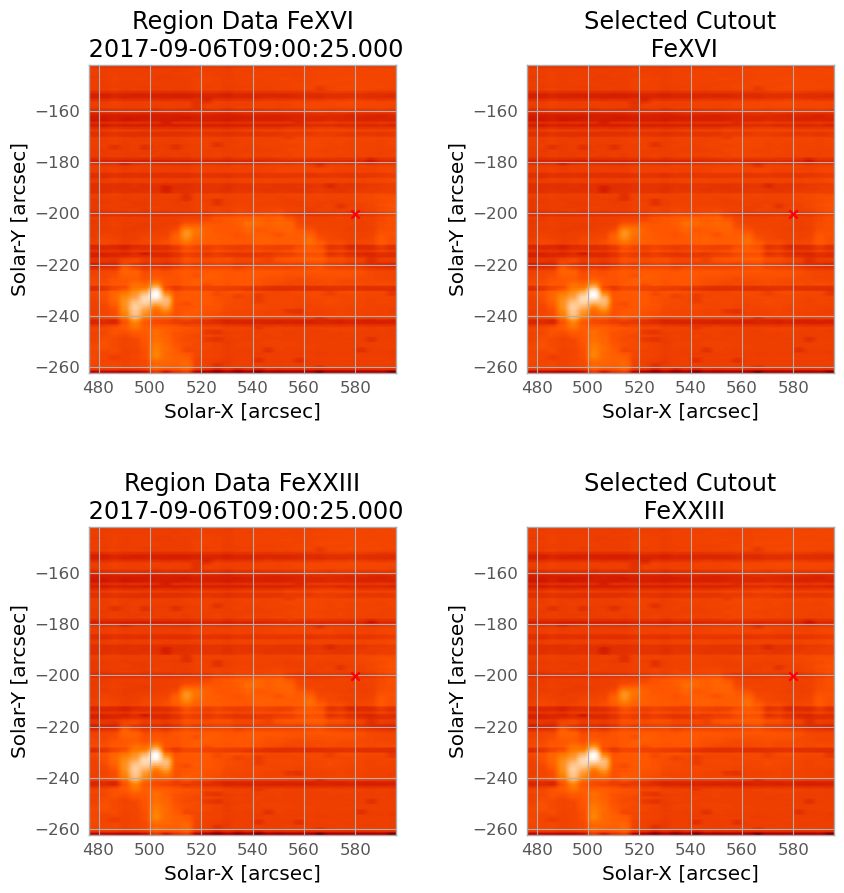

In [14]:
    # Make a multi-panel figure with the cutout and example profile

    import matplotlib.gridspec as gridspec
    
    # fig = plt.figure(figsize=[10,5])
    # plot_grid = fig.add_gridspec(nrows=2, ncols=4, wspace=0.3)
    
    #####First Figure window for intensity and cutout#####
    fig = plt.figure(figsize=[10,10])
    
    
    
    plot_grid = fig.add_gridspec(nrows=2, ncols=2, wspace=0.3)
    
    
    # data_subplt = fig.add_subplot(plot_grid[0,0])
    # data_subplt.imshow(sum_data_inten, origin='lower', extent = data_cube.meta['extent_arcsec'])
    data_subplt = fig.add_subplot(plot_grid[0,0])
    data_subplt.scatter(x_arcsec, y_arcsec, color='r', marker='x')
    # data_subplt.imshow(sum_data_inten, origin='lower', extent = data_cube.meta['extent_arcsec'])
    data_subplt.imshow(sum_data_fullregion1, norm=colors.PowerNorm(gamma=0.2) ,origin='lower', extent = Gaussdata_cube1.meta['extent_arcsec'])
    data_subplt.set_title('Region Data FeXVI\n'+' ' +gauss_cutout1.meta['mod_index']['date_obs'])
    data_subplt.set_xlabel('Solar-X [arcsec]')
    data_subplt.set_ylabel('Solar-Y [arcsec]')
    
    data_subplt = fig.add_subplot(plot_grid[0,1])
    data_subplt.scatter(x_arcsec, y_arcsec, color='r', marker='x')
    # data_subplt.imshow(sum_data_inten, origin='lower', extent = data_cube.meta['extent_arcsec'])
    data_subplt.imshow(sum_data_inten1, norm=colors.PowerNorm(gamma=0.2) , origin='lower', extent = gauss_cutout1.meta['extent_arcsec'])
    data_subplt.set_title('Selected Cutout\n FeXVI')
    data_subplt.set_xlabel('Solar-X [arcsec]')
    data_subplt.set_ylabel('Solar-Y [arcsec]')
    
    
    
    data_subplt = fig.add_subplot(plot_grid[1,0])
    data_subplt.scatter(x_arcsec, y_arcsec, color='r', marker='x')
    # data_subplt.imshow(sum_data_inten, origin='lower', extent = data_cube.meta['extent_arcsec'])
    data_subplt.imshow(sum_data_fullregion2, norm=colors.PowerNorm(gamma=0.2) ,origin='lower', extent = Gaussdata_cube2.meta['extent_arcsec'])
    data_subplt.set_title('Region Data FeXXIII\n'+' ' +gauss_cutout2.meta['mod_index']['date_obs'])
    data_subplt.set_xlabel('Solar-X [arcsec]')
    data_subplt.set_ylabel('Solar-Y [arcsec]')
    
    data_subplt = fig.add_subplot(plot_grid[1,1])
    data_subplt.scatter(x_arcsec, y_arcsec, color='r', marker='x')
    # data_subplt.imshow(sum_data_inten, origin='lower', extent = data_cube.meta['extent_arcsec'])
    data_subplt.imshow(sum_data_inten2, norm=colors.PowerNorm(gamma=0.2) , origin='lower', extent = gauss_cutout2.meta['extent_arcsec'])
    data_subplt.set_title('Selected Cutout\n FeXXIII')
    data_subplt.set_xlabel('Solar-X [arcsec]')
    data_subplt.set_ylabel('Solar-Y [arcsec]')
    

INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]


Text(0.5, 0, 'Solar-X [arcsec]')

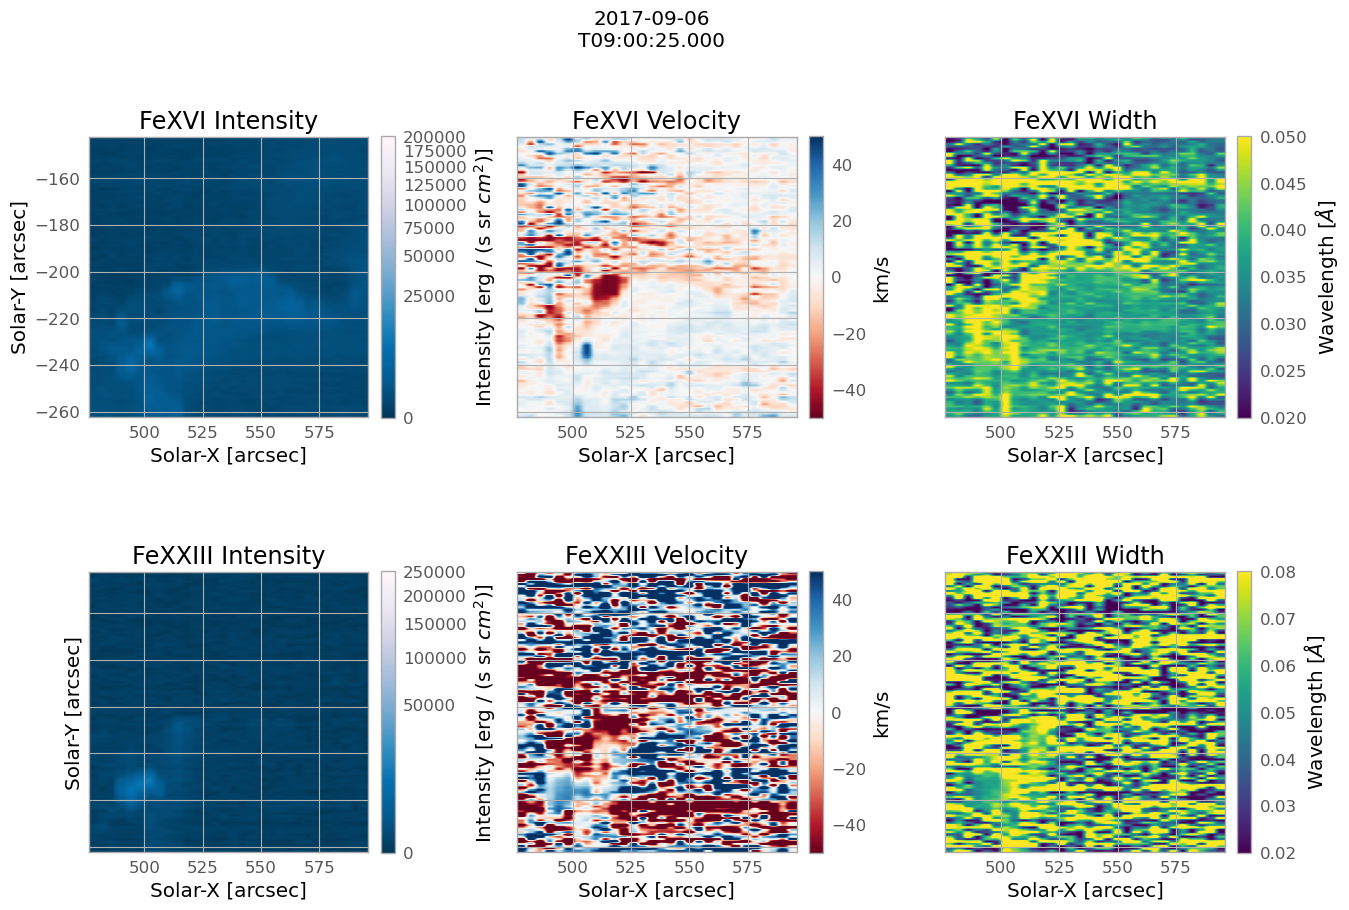

In [46]:
    
    #####Figure window for intensity, vel, width#####

    from matplotlib.gridspec import SubplotSpec

    fig = plt.figure(figsize=[15,10])
    plt.suptitle(gauss_cutout1.meta['mod_index']['date_obs'][0:10] + '\n' +gauss_cutout1.meta['mod_index']['date_obs'][10:])
    plot_grid = fig.add_gridspec(nrows=2, ncols=3, wspace=0.4, hspace = 0.3)
    


    #Subplots for Fe16

    data_subplt = fig.add_subplot(plot_grid[0,0])
    inten_map1 = fit_gauss1.get_map(component=0, measurement='intensity')
    #sunpy measurement map can be used in matplotlib subplt using .imshow by including .data at the end of our maps (e.g inten_map.data)
    data_subplt.imshow(inten_map1.data, norm=colors.PowerNorm(gamma=0.4, vmax  = 200000, vmin = 0) , origin='lower', extent = gauss_cutout1.meta['extent_arcsec'], cmap='PuBu_r')
    #define position for subplt colourbar
    pos1 = data_subplt.imshow(inten_map1.data, norm=colors.PowerNorm(gamma=0.4, vmax  = 200000, vmin = 0) , origin='lower', extent = gauss_cutout1.meta['extent_arcsec'], cmap='PuBu_r')
    
    # data_subplt.scatter(x_arcsec, y_arcsec, color='r', marker='x')
    data_subplt.set_title('FeXVI Intensity')
#Insert fraction=0.046, pad=0.04 to scale the colorbars appropriately
    fig.colorbar(pos1, fraction=0.046, pad=0.04, label = 'Intensity [erg / (s sr $cm^{2}$)]')

    data_subplt.set_xlabel('Solar-X [arcsec]')
    data_subplt.set_ylabel('Solar-Y [arcsec]')
    
    data_subplt = fig.add_subplot(plot_grid[0,1])
    vel_map1 = fit_gauss1.get_map(component=0, measurement='vel')
    #sunpy measurement map can be used in matplotlib subplt using .imshow by including .data at the end of our maps (e.g inten_map.data)
    data_subplt.imshow(vel_map1.data,origin='lower', extent = gauss_cutout1.meta['extent_arcsec'], cmap = 'RdBu', vmax = 50, vmin = -50)
    #define position for subplt colourbar
    pos2 = data_subplt.imshow(vel_map1.data,origin='lower', extent = gauss_cutout1.meta['extent_arcsec'], cmap = 'RdBu', vmax = 50, vmin = -50)
    data_subplt.set_title('FeXVI Velocity')
    fig.colorbar(pos2, fraction=0.046, pad=0.04, label = 'km/s')
    plt.setp(data_subplt.get_yticklabels(), visible=False)
    data_subplt.set_xlabel('Solar-X [arcsec]')
    
    data_subplt = fig.add_subplot(plot_grid[0,2])
    width_map1 = fit_gauss1.get_map(component=0, measurement='width')
    #sunpy measurement map can be used in matplotlib subplt using .imshow by including .data at the end of our maps (e.g inten_map.data)
    data_subplt.imshow(width_map1.data,origin='lower', extent = gauss_cutout1.meta['extent_arcsec'], cmap = 'viridis', vmax = 0.05, vmin = 0.02)
    #define position for subplt colourbar
    pos3 = data_subplt.imshow(width_map1.data,origin='lower', extent = gauss_cutout1.meta['extent_arcsec'], cmap = 'viridis', vmax = 0.05, vmin = 0.02)
    data_subplt.set_title('FeXVI Width')
    fig.colorbar(pos3,fraction=0.046, pad=0.04, label = 'Wavelength [$\AA$]')
    plt.setp(data_subplt.get_yticklabels(), visible=False)
    data_subplt.set_xlabel('Solar-X [arcsec]')



    #Subplots for Fe23

    data_subplt = fig.add_subplot(plot_grid[1,0])
    inten_map2 = fit_gauss2.get_map(component=0, measurement='intensity')
    #sunpy measurement map can be used in matplotlib subplt using .imshow by including .data at the end of our maps (e.g inten_map.data)
    data_subplt.imshow(inten_map2.data, norm=colors.PowerNorm(gamma=0.4, vmax  = 250000, vmin = 0) , origin='lower', extent = gauss_cutout2.meta['extent_arcsec'], cmap='PuBu_r')
    #define position for subplt colourbar
    pos4 = data_subplt.imshow(inten_map2.data, norm=colors.PowerNorm(gamma=0.4, vmax  = 250000, vmin = 0) , origin='lower', extent = gauss_cutout2.meta['extent_arcsec'], cmap='PuBu_r')
    # data_subplt.scatter(x_arcsec, y_arcsec, color='r', marker='x')
    data_subplt.set_title('FeXXIII Intensity')
#Insert fraction=0.046, pad=0.04 to scale the colorbars appropriately
    fig.colorbar(pos4, fraction=0.046, pad=0.04, label = 'Intensity [erg / (s sr $cm^{2}$)]')
    plt.setp(data_subplt.get_yticklabels(), visible=False)
    data_subplt.set_xlabel('Solar-X [arcsec]')
    data_subplt.set_ylabel('Solar-Y [arcsec]')
    
    data_subplt = fig.add_subplot(plot_grid[1,1])
    vel_map2 = fit_gauss2.get_map(component=0, measurement='vel')
    #sunpy measurement map can be used in matplotlib subplt using .imshow by including .data at the end of our maps (e.g inten_map.data)
    data_subplt.imshow(vel_map2.data,origin='lower', extent = gauss_cutout2.meta['extent_arcsec'], cmap = 'RdBu', vmax = 50, vmin = -50)
    #define position for subplt colourbar
    pos5 = data_subplt.imshow(vel_map2.data,origin='lower', extent = gauss_cutout2.meta['extent_arcsec'], cmap = 'RdBu', vmax = 50, vmin = -50)
    data_subplt.set_title('FeXXIII Velocity')
    fig.colorbar(pos5, fraction=0.046, pad=0.04, label = 'km/s')
    plt.setp(data_subplt.get_yticklabels(), visible=False)
    data_subplt.set_xlabel('Solar-X [arcsec]')
    
    data_subplt = fig.add_subplot(plot_grid[1,2])
    width_map2 = fit_gauss2.get_map(component=0, measurement='width')
    #sunpy measurement map can be used in matplotlib subplt using .imshow by including .data at the end of our maps (e.g inten_map.data)
    data_subplt.imshow(width_map2.data,origin='lower', extent = gauss_cutout2.meta['extent_arcsec'], cmap = 'viridis', vmax = 0.08, vmin = 0.02)
    #define position for subplt colourbar
    pos6 = data_subplt.imshow(width_map2.data,origin='lower', extent = gauss_cutout2.meta['extent_arcsec'], cmap = 'viridis', vmax = 0.08, vmin = 0.02)
    data_subplt.set_title('FeXXIII Width')
    fig.colorbar(pos6,fraction=0.046, pad=0.04, label = 'Wavelength [$\AA$]')
    plt.setp(data_subplt.get_yticklabels(), visible=False)


    data_subplt.set_xlabel('Solar-X [arcsec]')

    


INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]


Text(0.5, 0, 'Wavelength [$\\AA$]')

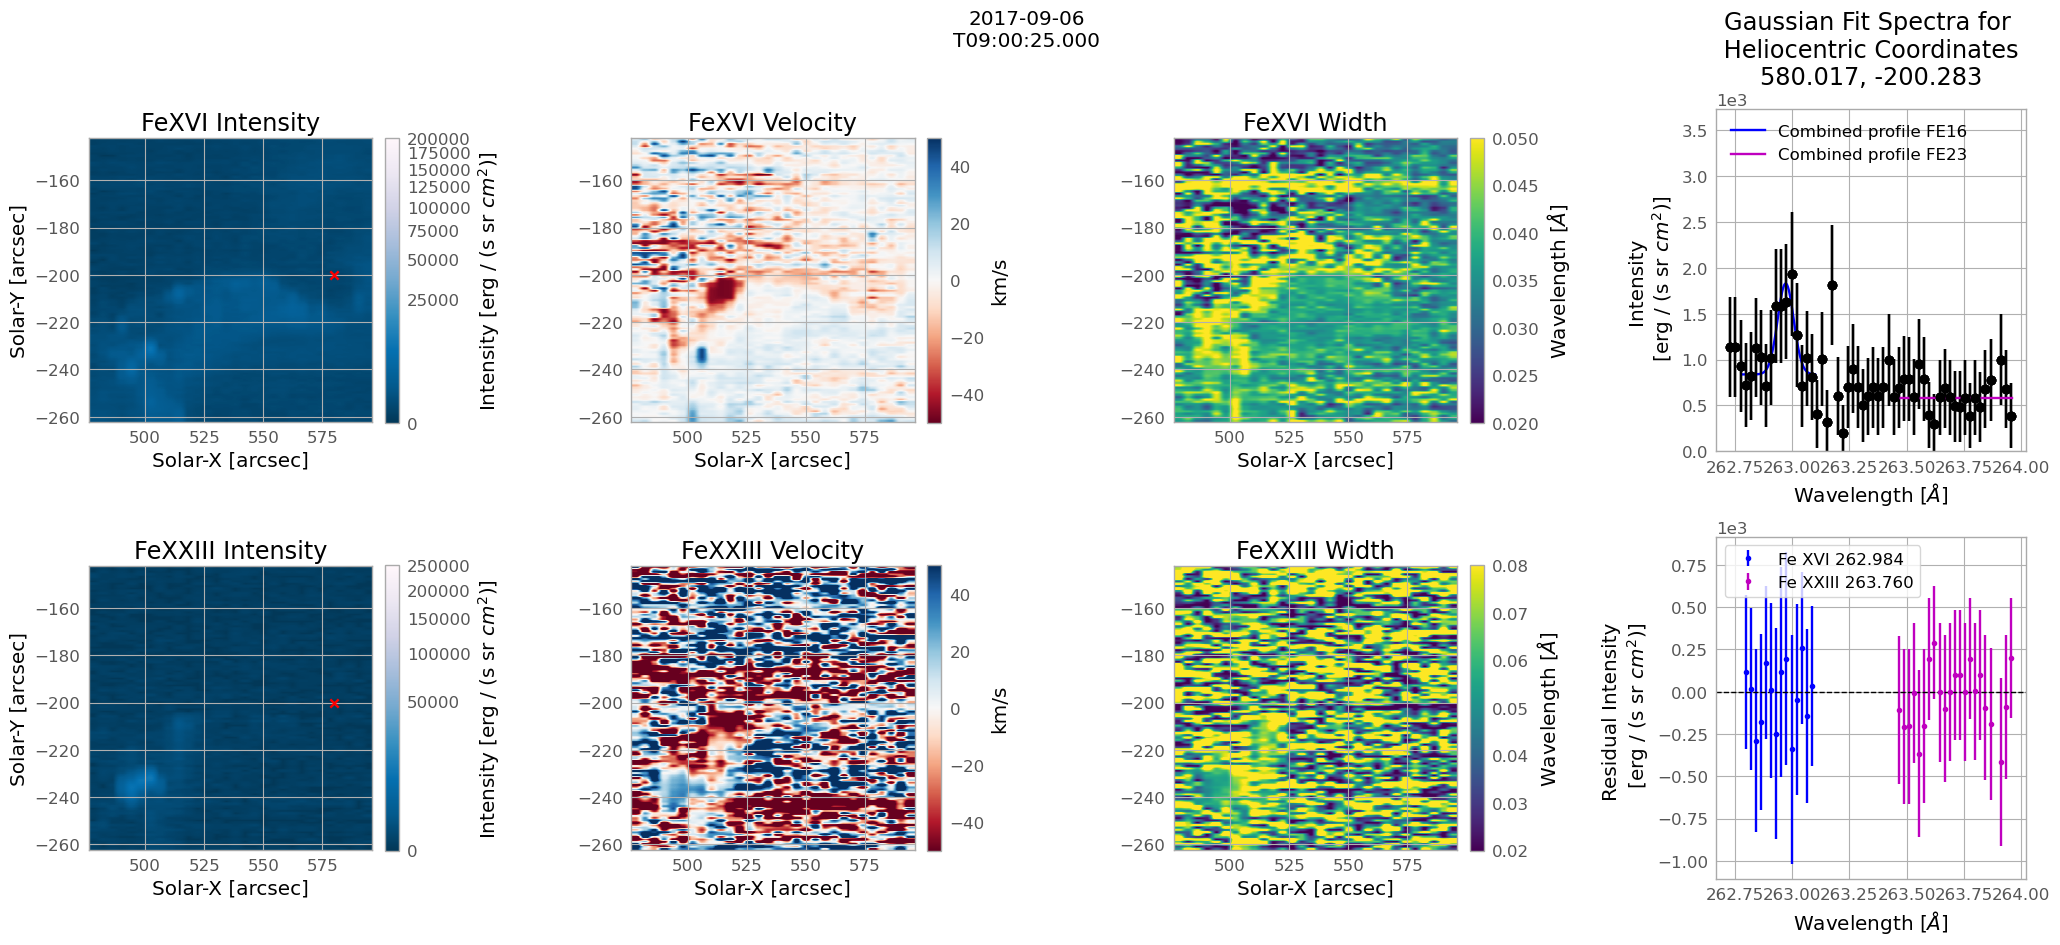

In [39]:
    
    #####2nd Figure window for intensity, vel, width, and spectra#####


        #2nd Figure window for intensity, vel, width, and spectra
    from matplotlib.gridspec import SubplotSpec

    fig = plt.figure(figsize=[25,10])
    plt.suptitle(gauss_cutout1.meta['mod_index']['date_obs'][0:10] + '\n' +gauss_cutout1.meta['mod_index']['date_obs'][10:])
    plot_grid = fig.add_gridspec(nrows=2, ncols=4, wspace=0.75, hspace = 0.25)
    


    #Subplots for Fe16

    data_subplt = fig.add_subplot(plot_grid[0,0])
    inten_map1 = fit_gauss1.get_map(component=0, measurement='intensity')
    #sunpy measurement map can be used in matplotlib subplt using .imshow by including .data at the end of our maps (e.g inten_map.data)
    data_subplt.imshow(inten_map1.data, norm=colors.PowerNorm(gamma=0.4, vmax  = 200000, vmin = 0) , origin='lower', extent = gauss_cutout1.meta['extent_arcsec'], cmap='PuBu_r')
    #define position for subplt colourbar
    pos1 = data_subplt.imshow(inten_map1.data, norm=colors.PowerNorm(gamma=0.4, vmax  = 200000, vmin = 0) , origin='lower', extent = gauss_cutout1.meta['extent_arcsec'], cmap='PuBu_r')
    
    data_subplt.scatter(x_arcsec, y_arcsec, color='r', marker='x')
    data_subplt.set_title('FeXVI Intensity')
#Insert fraction=0.046, pad=0.04 to scale the colorbars appropriately
    fig.colorbar(pos1, fraction=0.046, pad=0.04, label = 'Intensity [erg / (s sr $cm^{2}$)]')

    data_subplt.set_xlabel('Solar-X [arcsec]')
    data_subplt.set_ylabel('Solar-Y [arcsec]')
    
    data_subplt = fig.add_subplot(plot_grid[0,1])
    vel_map = fit_gauss1.get_map(component=0, measurement='vel')
    #sunpy measurement map can be used in matplotlib subplt using .imshow by including .data at the end of our maps (e.g inten_map.data)
    data_subplt.imshow(vel_map.data,origin='lower', extent = gauss_cutout1.meta['extent_arcsec'], cmap = 'RdBu', vmax = 50, vmin = -50)
    #define position for subplt colourbar
    pos2 = data_subplt.imshow(vel_map.data,origin='lower', extent = gauss_cutout1.meta['extent_arcsec'], cmap = 'RdBu', vmax = 50, vmin = -50)
    data_subplt.set_title('FeXVI Velocity')
    fig.colorbar(pos2, fraction=0.046, pad=0.04, label = 'km/s')

    data_subplt.set_xlabel('Solar-X [arcsec]')
    
    data_subplt = fig.add_subplot(plot_grid[0,2])
    width_map = fit_gauss1.get_map(component=0, measurement='width')
    #sunpy measurement map can be used in matplotlib subplt using .imshow by including .data at the end of our maps (e.g inten_map.data)
    data_subplt.imshow(width_map.data,origin='lower', extent = gauss_cutout1.meta['extent_arcsec'], cmap = 'viridis', vmax = 0.05, vmin = 0.02)
    #define position for subplt colourbar
    pos3 = data_subplt.imshow(width_map.data,origin='lower', extent = gauss_cutout1.meta['extent_arcsec'], cmap = 'viridis', vmax = 0.05, vmin = 0.02)
    data_subplt.set_title('FeXVI Width')
    fig.colorbar(pos3,fraction=0.046, pad=0.04, label = 'Wavelength [$\AA$]')

    data_subplt.set_xlabel('Solar-X [arcsec]')



    #Subplots for Fe23

    data_subplt = fig.add_subplot(plot_grid[1,0])
    inten_map2 = fit_gauss2.get_map(component=0, measurement='intensity')
    #sunpy measurement map can be used in matplotlib subplt using .imshow by including .data at the end of our maps (e.g inten_map.data)
    data_subplt.imshow(inten_map2.data, norm=colors.PowerNorm(gamma=0.4, vmax  = 250000, vmin = 0) , origin='lower', extent = gauss_cutout2.meta['extent_arcsec'], cmap='PuBu_r')
    #define position for subplt colourbar
    pos4 = data_subplt.imshow(inten_map2.data, norm=colors.PowerNorm(gamma=0.4, vmax  = 250000, vmin = 0) , origin='lower', extent = gauss_cutout2.meta['extent_arcsec'], cmap='PuBu_r')
    data_subplt.scatter(x_arcsec, y_arcsec, color='r', marker='x')
    data_subplt.set_title('FeXXIII Intensity')
#Insert fraction=0.046, pad=0.04 to scale the colorbars appropriately
    fig.colorbar(pos4, fraction=0.046, pad=0.04, label = 'Intensity [erg / (s sr $cm^{2}$)]')

    data_subplt.set_xlabel('Solar-X [arcsec]')
    data_subplt.set_ylabel('Solar-Y [arcsec]')
    
    data_subplt = fig.add_subplot(plot_grid[1,1])
    vel_map = fit_gauss2.get_map(component=0, measurement='vel')
    #sunpy measurement map can be used in matplotlib subplt using .imshow by including .data at the end of our maps (e.g inten_map.data)
    data_subplt.imshow(vel_map.data,origin='lower', extent = gauss_cutout2.meta['extent_arcsec'], cmap = 'RdBu', vmax = 50, vmin = -50)
    #define position for subplt colourbar
    pos5 = data_subplt.imshow(vel_map.data,origin='lower', extent = gauss_cutout2.meta['extent_arcsec'], cmap = 'RdBu', vmax = 50, vmin = -50)
    data_subplt.set_title('FeXXIII Velocity')
    fig.colorbar(pos5, fraction=0.046, pad=0.04, label = 'km/s')

    data_subplt.set_xlabel('Solar-X [arcsec]')
    
    data_subplt = fig.add_subplot(plot_grid[1,2])
    width_map = fit_gauss2.get_map(component=0, measurement='width')
    #sunpy measurement map can be used in matplotlib subplt using .imshow by including .data at the end of our maps (e.g inten_map.data)
    data_subplt.imshow(width_map.data,origin='lower', extent = gauss_cutout2.meta['extent_arcsec'], cmap = 'viridis', vmax = 0.08, vmin = 0.02)
    #define position for subplt colourbar
    pos6 = data_subplt.imshow(width_map.data,origin='lower', extent = gauss_cutout2.meta['extent_arcsec'], cmap = 'viridis', vmax = 0.08, vmin = 0.02)
    data_subplt.set_title('FeXXIII Width')
    fig.colorbar(pos6,fraction=0.046, pad=0.04, label = 'Wavelength [$\AA$]')


    data_subplt.set_xlabel('Solar-X [arcsec]')

#plotting spectra FEXVI
    profile_subplt = fig.add_subplot(plot_grid[0,3])
    profile_subplt.errorbar(data_x1, data_y1, yerr=data_err1, ls='', marker='o', color='k')
    profile_subplt.plot(data_x1, data_y1, ls='', marker='o', color='k')
    profile_subplt.plot(fit_x1, fit_y1, color='b', label='Combined profile FE16')
    # profile_subplt.plot(c0_x1, c0_y1, color='r', label=fit_res1.fit['line_ids'][0])
#plotting spectra FEXXIII
    profile_subplt.errorbar(data_x2, data_y2, yerr=data_err2, ls='', marker='o', color='k')
    profile_subplt.plot(data_x2, data_y2, ls='', marker='o', color='k')
    profile_subplt.plot(fit_x2, fit_y2, color='m', label='Combined profile FE23')
    # profile_subplt.plot(c0_x2, c0_y2, color='g', label=fit_res2.fit['line_ids'][0])

    # profile_subplt.plot(c1_x, c1_y, color='r', ls='--', label=fit_res.fit['line_ids'][1])
    # profile_subplt.plot(c2_x, c2_y, color='g', label='Background')
    # profile_subplt.set_title(f'Cutout indices: iy = {iy}, ix = {ix}')
    profile_subplt.set_title('Gaussian Fit Spectra for \n Heliocentric Coordinates \n' f'{"{:.3f}".format(x_arcsec)}, {"{:.3f}".format(y_arcsec)}')
    profile_subplt.set_xlabel('Wavelength [$\AA$]')
    profile_subplt.set_ylabel('Intensity\n [erg / (s sr $cm^{2}$)]')
    profile_subplt.legend(loc='upper left', frameon=False)
    profile_subplt.set_ylim(0)
    profile_subplt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

    data_subplt.set_xlabel('Solar-X [arcsec]')

#Residuals plotting
    fit_x_vals1, fit_y_vals1 = fit_gauss1.get_fit_profile(coords=[iy,ix],use_mask=True) #use len(data_y) to get compatible array length for residuals, if necessary
    fit_x_vals2, fit_y_vals2 = fit_gauss2.get_fit_profile(coords=[iy,ix],use_mask=True) #use len(data_y) to get compatible array length for residuals, if necessary
   

# print(fit_x_vals)
    resids1 = fit_y_vals1 - data_y1
    resids2 = fit_y_vals2 - data_y2
    profile_subplt2 = fig.add_subplot(plot_grid[1,3], sharex= profile_subplt)
    
    plt.errorbar(x=fit_x_vals1, y=resids1, yerr=data_err1, fmt='.', color ='b', label=fit_gauss1.fit['line_ids'][0])
    plt.errorbar(x=fit_x_vals2, y=resids2, yerr=data_err2, fmt='.', color ='m', label=fit_gauss2.fit['line_ids'][0])
    plt.axhline(0.0, linestyle='--', color= 'black', linewidth=1)
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    plt.legend(loc='upper left')
    plt.ylabel('Residual Intensity \n [erg / (s sr $cm^{2}$)]')
    plt.xlabel('Wavelength [$\AA$]')

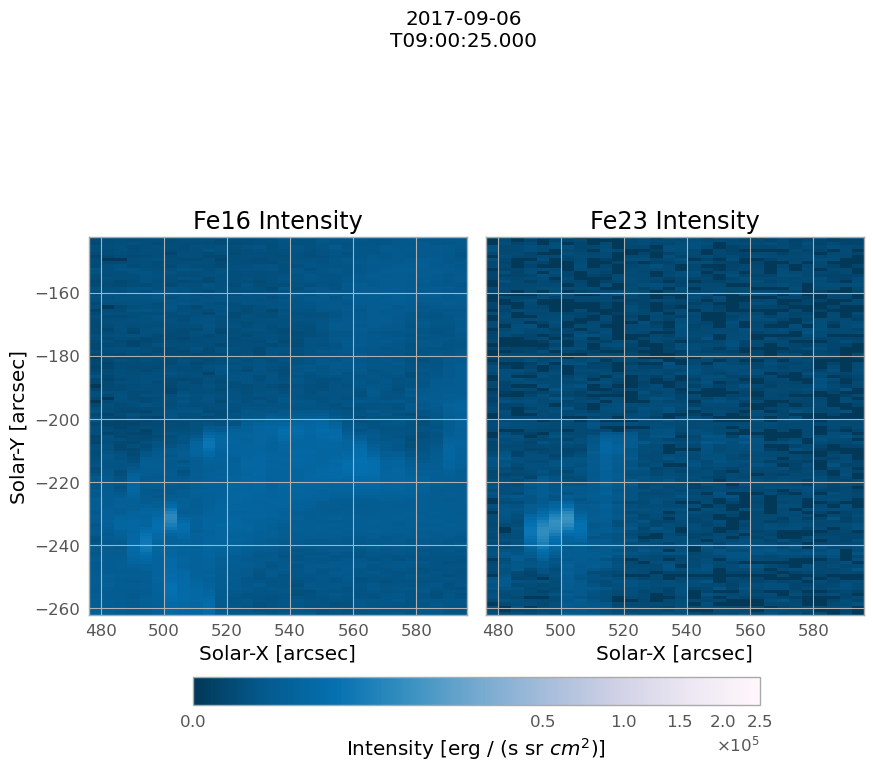

In [16]:
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=[10,8]) 
    plt.suptitle(gauss_cutout1.meta['mod_index']['date_obs'][0:10] + '\n' +gauss_cutout1.meta['mod_index']['date_obs'][10:])
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.05, hspace=None)
    # plot_grid = fig.add_gridspec(nrows=1, ncols=2, wspace=0.4)
        
    ####FE16 KAPPA####
    # subplt = fig.add_subplot(plot_grid[0,0])
    ax1.set_xlabel('Solar-X [arcsec]')
    ax1.set_ylabel('Solar-Y [arcsec]')
    
    ax1.set_title('Fe16 Intensity')
    fe16inten = ax1.imshow(inten_map1.data, norm=colors.PowerNorm(gamma=0.3, vmax  = 250000, vmin = 0) , origin='lower', extent = gauss_cutout1.meta['extent_arcsec'], cmap='PuBu_r')
    # pos1 = subplt.imshow(inten_map1.data, norm=colors.PowerNorm(gamma=0.4, vmax  = 250000, vmin = 0) , origin='lower', extent = gauss_cutout1.meta['extent_arcsec'], cmap='PuBu_r')
    
    # fig.colorbar(pos1, fraction=0.046, pad=0.05,label = "Intensity", format='%.0e')
    
    ####FE23 KAPPA#####

    ax2.set_xlabel('Solar-X [arcsec]')
    # ax2.set_ylabel('Solar-Y [arcsec]')
    
    ax2.set_title('Fe23 Intensity')
    ax2.imshow(inten_map2.data, norm=colors.PowerNorm(gamma=0.3, vmax  = 250000, vmin = 0) , origin='lower', extent = gauss_cutout2.meta['extent_arcsec'], cmap='PuBu_r')
    # subplt = fig.add_subplot(plot_grid[0,1])
    # subplt.set_xlabel('Solar-X [arcsec]')
    
    # subplt.set_title('Fe23 $\kappa$ Map')
    # subplt.imshow(inten_map2.data, norm=colors.PowerNorm(gamma=0.4, vmax  = 250000, vmin = 0) , origin='lower', extent = gauss_cutout2.meta['extent_arcsec'], cmap='PuBu_r')
    # pos2 = subplt.imshow(inten_map2.data, norm=colors.PowerNorm(gamma=0.4, vmax  = 250000, vmin = 0) , origin='lower', extent = gauss_cutout2.meta['extent_arcsec'], cmap='PuBu_r')
    fmt = plt.ScalarFormatter(useMathText=True)
    fmt.set_powerlimits((0, 0))
    cbar = fig.colorbar(fe16inten, ax=(ax1,ax2), orientation= 'horizontal', fraction=0.046, pad=0.1,label = "Intensity [erg / (s sr $cm^{2}$)]", format=fmt)
    
    plt.setp(ax2.get_yticklabels(), visible=False)
    # plt.colorbar(pos1, orientation= 'horizontal')
    
    plt.show()

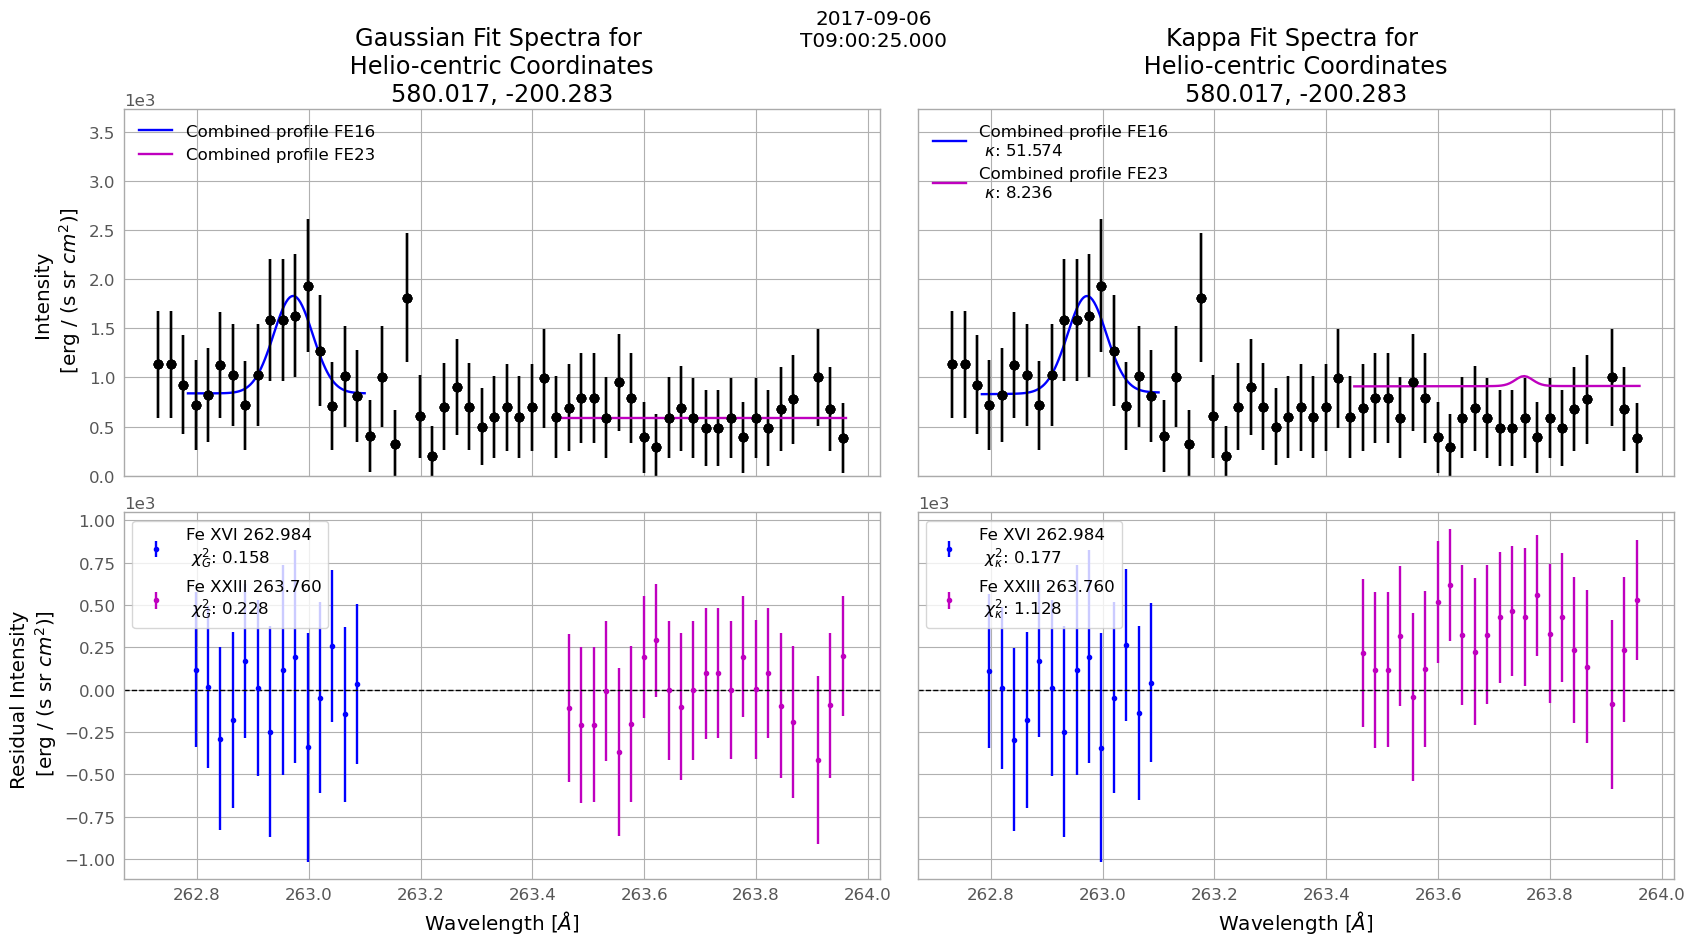

In [36]:
    
    #####3rd Fig Window for spectra and residuals only#####
     #3rd Fig Window for spectra and residuals only
    fig = plt.figure(figsize=[20,10])
    
    plt.suptitle(gauss_cutout1.meta['mod_index']['date_obs'][0:10] + '\n' +gauss_cutout1.meta['mod_index']['date_obs'][10:])
    
    #Define values for residuals and plot spectra


    ###Gauss Fits###

    #Define values for residuals and plot spectra
    
    fit_x_vals1, fit_y_vals1 = fit_gauss1.get_fit_profile(coords=[iy,ix],use_mask=True) #use len(data_y) to get compatible array length for residuals, if necessary
    fit_x_vals2, fit_y_vals2 = fit_gauss2.get_fit_profile(coords=[iy,ix],use_mask=True) #use len(data_y) to get compatible array length for residuals, if necessary
    
    plot_grid = fig.add_gridspec(nrows=2, ncols=2, wspace=0.05, hspace = 0.10)
    
    profile_subplt = fig.add_subplot(plot_grid[0,0])
    profile_subplt.errorbar(data_x1, data_y1, yerr=data_err1, ls='', marker='o', color='k')
    profile_subplt.plot(data_x1, data_y1, ls='', marker='o', color='k')
    profile_subplt.plot(fit_x1, fit_y1, color='b', label='Combined profile FE16')
    # profile_subplt.plot(c0_x1, c0_y1, color='r', label=fit_res1.fit['line_ids'][0])
    #plotting spectra FEXXIII
    profile_subplt.errorbar(data_x2, data_y2, yerr=data_err2, ls='', marker='o', color='k')
    profile_subplt.plot(data_x2, data_y2, ls='', marker='o', color='k')
    profile_subplt.plot(fit_x2, fit_y2, color='m', label='Combined profile FE23')
    # profile_subplt.plot(c0_x2, c0_y2, color='g', label=fit_res2.fit['line_ids'][0])
    
    # profile_subplt.plot(c1_x, c1_y, color='r', ls='--', label=fit_res.fit['line_ids'][1])
    # profile_subplt.plot(c2_x, c2_y, color='g', label='Background')
    # profile_subplt.set_title(f'Cutout indices: iy = {iy}, ix = {ix}')
    profile_subplt.set_title('Gaussian Fit Spectra for \n Helio-centric Coordinates \n' f'{"{:.3f}".format(x_arcsec)}, {"{:.3f}".format(y_arcsec)}')
    profile_subplt.set_xlabel('Wavelength [$\AA$]')
    profile_subplt.set_ylabel('Intensity \n [erg / (s sr $cm^2$)]')
    profile_subplt.legend(loc='upper left', frameon=False)
    profile_subplt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    
    # data_subplt.set_xlabel('Solar-X [arcsec]')
    # data_subplt.set_ylabel('Solar-Y [arcsec]')
    
    #Remove tick labels from upper spectra to 'blend' with residual plot
    profile_subplt.label_outer()
    
    
    
    #Set up and plot residuals
    resids1 = fit_y_vals1 - data_y1
    resids2 = fit_y_vals2 - data_y2
    # print(resids1)
    # print(np.sum(resids1**2/fit_y_vals1))

# ###chi2 testing
# #data[data.mask == False]
#     from scipy import stats
#     print(fit_y_vals1)
#     fit_y_unmasked = fit_y_vals1[fit_y_vals1.mask == False]
#     print(fit_y_unmasked)
#     data_ymask = data_y1[fit_y_vals1.mask == True]
#     print(data_y1)
#     print(data_y1[3:][:14])
#     print(sum(data_y1[3:][:14]))
# ####    
          
    profile_subplt2 = fig.add_subplot(plot_grid[1,0], sharex= profile_subplt)
    
    profile_subplt2.errorbar(x=fit_x_vals1, y=resids1, yerr=data_err1, fmt='.', color ='b', label=fit_gauss1.fit['line_ids'][0] + '\n '+ '$\chi_{G}^{2}$:' + ' ' + "{:.3f}".format(chi2fit1))
    profile_subplt2.errorbar(x=fit_x_vals2, y=resids2, yerr=data_err2, fmt='.', color ='m', label=fit_gauss2.fit['line_ids'][0] + '\n '+ '$\chi_{G}^{2}$:' + ' ' + "{:.3f}".format(chi2fit2))
    profile_subplt2.axhline(0.0, linestyle='--', color= 'black', linewidth=1)
    profile_subplt2.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    profile_subplt2.legend(loc='upper left')
    plt.ylabel('Residual Intensity \n [erg / (s sr $cm^2$)]')
    profile_subplt2.set_xlabel('Wavelength [$\AA$]')
    #define limits for residual axis
    # plt.ylim(-4000,3300)



    ######Kappa Fits #######
    ########################
    #Define values for residuals and plot spectra


   
    kfit_x_vals1, kfit_y_vals1 = fit_res1.get_fit_profile(coords=[iy,ix],use_mask=True) #use len(data_y) to get compatible array length for residuals, if necessary
    kfit_x_vals2, kfit_y_vals2 = fit_res2.get_fit_profile(coords=[iy,ix],use_mask=True) #use len(data_y) to get compatible array length for residuals, if necessary
    
    profile_subplt3 = fig.add_subplot(plot_grid[0,1], sharey= profile_subplt)
    profile_subplt3.errorbar(KAPdata_x1, KAPdata_y1, yerr=KAPdata_err1, ls='', marker='o', color='k')
    profile_subplt3.plot(KAPdata_x1, KAPdata_y1, ls='', marker='o', color='k')
    profile_subplt3.plot(KAPfit_x1, KAPfit_y1, color='b', label='Combined profile FE16' + '\n '+ '$\kappa$:' + ' ' + "{:.3f}".format(kappaparam1))
    # profile_subplt.plot(c0_x1, c0_y1, color='r', label=fit_res1.fit['line_ids'][0])
    #plotting spectra FEXXIII
    profile_subplt3.errorbar(KAPdata_x2, KAPdata_y2, yerr=KAPdata_err2, ls='', marker='o', color='k')
    profile_subplt3.plot(KAPdata_x2, KAPdata_y2, ls='', marker='o', color='k')
    profile_subplt3.plot(KAPfit_x2, KAPfit_y2, color='m', label='Combined profile FE23' + '\n '+ '$\kappa$:' + ' ' + "{:.3f}".format(kappaparam2))

    profile_subplt3.set_title('Kappa Fit Spectra for \n Helio-centric Coordinates \n' f'{"{:.3f}".format(x_arcsec)}, {"{:.3f}".format(y_arcsec)}')
    profile_subplt3.set_xlabel('Wavelength [$\AA$]')
    profile_subplt3.set_ylabel('Intensity \n [erg / (s sr $cm^2$)]')
    profile_subplt3.legend(loc='upper left', frameon=False)
    
    #Remove tick labels from upper spectra to 'blend' with residual plot
    profile_subplt3.label_outer()
    # plt.setp(profile_subplt3.get_xticklabels(), visible=False)
    plt.ylim(0)




    #Set up and plot residuals
    kresids1 = kfit_y_vals1 - KAPdata_y1
    kresids2 = kfit_y_vals2 - KAPdata_y2

          
    profile_subplt4 = fig.add_subplot(plot_grid[1,1], sharex= profile_subplt3, sharey= profile_subplt2)
    
    profile_subplt4.errorbar(x=kfit_x_vals1, y=kresids1, yerr=KAPdata_err1, fmt='.', color ='b', label=fit_res1.fit['line_ids'][0] + '\n '+ r'$\chi_{\kappa}^{2}$:' + ' ' + "{:.3f}".format(KAPchi2fit1))
    profile_subplt4.errorbar(x=kfit_x_vals2, y=kresids2, yerr=KAPdata_err2, fmt='.', color ='m', label=fit_res2.fit['line_ids'][0] + '\n '+ r'$\chi_{\kappa}^{2}$:' + ' ' + "{:.3f}".format(KAPchi2fit2))
    profile_subplt4.axhline(0.0, linestyle='--', color= 'black', linewidth=1)
    # profile_subplt4.yaxis.set_visible(False)
    # profile_subplt4.get_yticklabels(False)
    ####Hide ticklabels for y axis
    plt.setp(profile_subplt4.get_yticklabels(), visible=False)
    # profile_subplt4.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    profile_subplt4.legend(loc='upper left')
    profile_subplt4.set_xlabel('Wavelength [$\AA$]')
    #define limits for residual axis
    # plt.ylim(-4000,3300)

    
    
    plt.show()


    
    
         

PRODUCING VARIOUS SPECTRA FOR OTHER OBSERVATION POINTS

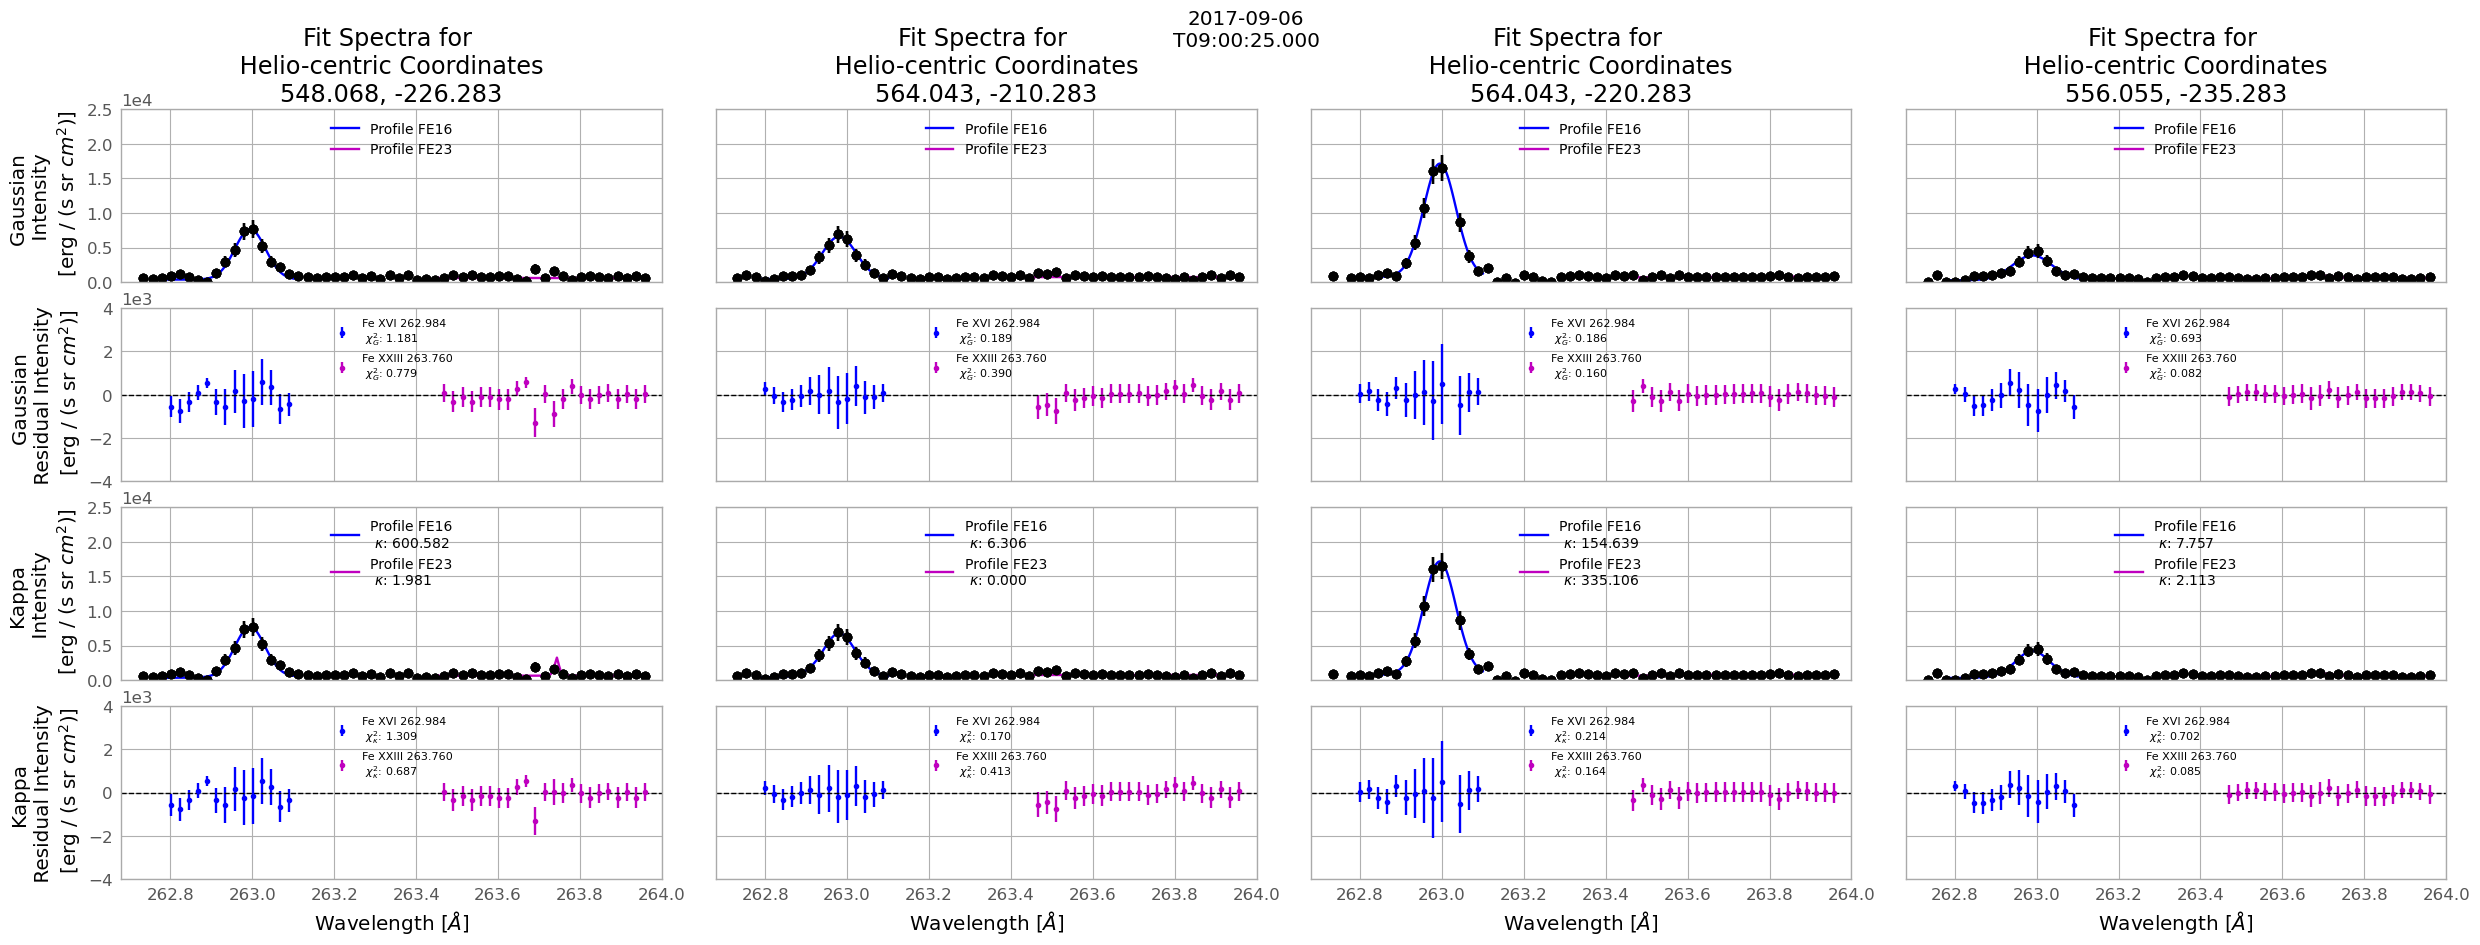

In [79]:
iy1, ix1 = worldtoindex(gauss_cutout1, 549, -226)[0], worldtoindex(gauss_cutout1, 549, -226)[1]
iy2, ix2 = worldtoindex(gauss_cutout1, 565, -210)[0], worldtoindex(gauss_cutout1, 565, -210)[1]
iy3, ix3 = worldtoindex(gauss_cutout1, 565, -220)[0], worldtoindex(gauss_cutout1, 565, -220)[1]
iy4, ix4 = worldtoindex(gauss_cutout1, 558, -235)[0], worldtoindex(gauss_cutout1, 558, -235)[1]

aiy = [iy1, iy2, iy3, iy4]
aix = [ix1, ix2, ix3, ix4]

fig = plt.figure(figsize=[30,10])

plt.suptitle(gauss_cutout1.meta['mod_index']['date_obs'][0:10] + '\n' +gauss_cutout1.meta['mod_index']['date_obs'][10:])
# plt.tight_layout()
    
plot_grid = fig.add_gridspec(nrows=4, ncols=4, wspace=0.1, hspace = 0.15)

#Define values for residuals and plot spectra

for i in range(len(aiy)):
        # Extract data profile and interpolate fit at higher spectral resolution
    
    aex_world_coords1 = gauss_cutout1.wcs.array_index_to_world(aiy[i], aix[i], 0)[1]
    aex_world_coords2 = gauss_cutout2.wcs.array_index_to_world(aiy[i], aix[i], 0)[1]
    
    
    # y_arcsec1, x_arcsec1 = ex_world_coords1.Ty.value, ex_world_coords1.Tx.value
    # y_arcsec2, x_arcsec2 = ex_world_coords2.Ty.value, ex_world_coords2.Tx.value
    
    ay_arcsec, ax_arcsec = aex_world_coords1.Ty.value, aex_world_coords1.Tx.value
    ##Gauss Data##
    
    adata_x1 = gauss_cutout1.wavelength[aiy[i],aix[i], :]
    adata_y1 = gauss_cutout1.data[aiy[i],aix[i], :]
    adata_err1 = gauss_cutout1.uncertainty.array[aiy[i],aix[i], :]
    ##replace negative err. values with 0 to permit plotting for affected pixels##
    adata_err1[adata_err1 < 0] = 0
    # print(data_err1)

    afit_x1, afit_y1 = fit_gauss1.get_fit_profile(coords=[aiy[i],aix[i]], num_wavelengths=100)
    achi2fit1 = fit_gauss1.fit['chi2'][aiy[i],aix[i]]
    # print(chi2fit1)
    # c0_x1, c0_y1 = fit_res1.get_fit_profile(0, coords=[iy,ix], num_wavelengths=100)
    
    adata_x2 = gauss_cutout2.wavelength[aiy[i],aix[i], :]
    adata_y2 = gauss_cutout2.data[aiy[i],aix[i], :]
    adata_err2 = gauss_cutout2.uncertainty.array[aiy[i],aix[i], :]
    ##replace negative err. values with 0 to permit plotting for affected pixels##
    adata_err2[adata_err2 < 0] = 0
    afit_x2, afit_y2 = fit_gauss2.get_fit_profile(coords=[aiy[i],aix[i]], num_wavelengths=100)
    achi2fit2 = fit_gauss2.fit['chi2'][aiy[i],aix[i]]
    # print(chi2fit2)
    # c0_x2, c0_y2 = fit_res2.get_fit_profile(0, coords=[iy,ix], num_wavelengths=100)


    ##Kappa Data##


    aKAPdata_x1 = raster_cutout1.wavelength[aiy[i],aix[i], :]
    aKAPdata_y1 = raster_cutout1.data[aiy[i],aix[i], :]
    aKAPdata_err1 = raster_cutout1.uncertainty.array[aiy[i],aix[i], :]
    ##replace negative err. values with 0 to permit plotting for affected pixels##
    aKAPdata_err1[aKAPdata_err1 < 0] = 0

    aKAPfit_x1, aKAPfit_y1 = fit_res1.get_fit_profile(coords=[aiy[i],aix[i]], num_wavelengths=100)
    aKAPchi2fit1 = fit_res1.fit['chi2'][aiy[i],aix[i]]
    akappaparam1 = fit_res1.fit['params'][aiy[i],aix[i]][4]
    akappaerr1 = fit_res1.fit['perror'][aiy[i],aix[i]]

    
    aKAPdata_x2 = raster_cutout2.wavelength[aiy[i],aix[i], :]
    aKAPdata_y2 = raster_cutout2.data[aiy[i],aix[i], :]
    aKAPdata_err2 = raster_cutout2.uncertainty.array[aiy[i],aix[i], :]
    ##replace negative err. values with 0 to permit plotting for affected pixels##
    aKAPdata_err2[aKAPdata_err2 < 0] = 0
    aKAPfit_x2, aKAPfit_y2 = fit_res2.get_fit_profile(coords=[aiy[i],aix[i]], num_wavelengths=100)
    aKAPchi2fit2 = fit_res2.fit['chi2'][aiy[i],aix[i]]
    # print(KAPchi2fit2)
    akappaparam2 = fit_res2.fit['params'][aiy[i],aix[i]][4]
    akappaerr2 = fit_res2.fit['perror'][aiy[i],aix[i]]

    
    ###Gauss Fits###
    
    #Define values for residuals and plot spectra
    
    afit_x_vals1, afit_y_vals1 = fit_gauss1.get_fit_profile(coords=[aiy[i],aix[i]],use_mask=True) #use len(data_y) to get compatible array length for residuals, if necessary
    afit_x_vals2, afit_y_vals2 = fit_gauss2.get_fit_profile(coords=[aiy[i],aix[i]],use_mask=True) #use len(data_y) to get compatible array length for residuals, if necessary
    
    profile_subplt = fig.add_subplot(plot_grid[0,i])
    profile_subplt.errorbar(adata_x1, adata_y1, yerr=adata_err1, ls='', marker='o', color='k')
    profile_subplt.plot(adata_x1, adata_y1, ls='', marker='o', color='k')
    profile_subplt.plot(afit_x1, afit_y1, color='b', label='Profile FE16')
    
    #plotting spectra FEXXIII
    profile_subplt.errorbar(adata_x2, adata_y2, yerr=adata_err2, ls='', marker='o', color='k')
    profile_subplt.plot(adata_x2, adata_y2, ls='', marker='o', color='k')
    profile_subplt.plot(afit_x2, afit_y2, color='m', label='Profile FE23')
    
    profile_subplt.set_title('Fit Spectra for \n Helio-centric Coordinates \n' f'{"{:.3f}".format(ax_arcsec)}, {"{:.3f}".format(ay_arcsec)}')
    profile_subplt.set_xlabel('Wavelength [$\AA$]')
    profile_subplt.set_ylabel('Gaussian \n Intensity \n [erg / (s sr $cm^2$)]')
    profile_subplt.legend(loc='upper center', frameon=False, fontsize="10")
    profile_subplt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    plt.ylim(0,2.5e4)
    # data_subplt.set_xlabel('Solar-X [arcsec]')
    # data_subplt.set_ylabel('Solar-Y [arcsec]')
    
    #Remove tick labels from upper spectra to 'blend' with residual plot
    profile_subplt.label_outer()


    
    #Set up and plot residuals
    aresids1 = afit_y_vals1 - adata_y1
    aresids2 = afit_y_vals2 - adata_y2

      
    profile_subplt2 = fig.add_subplot(plot_grid[1,i], sharex= profile_subplt)
            
    profile_subplt2.errorbar(x=afit_x_vals1, y=aresids1, yerr=adata_err1, fmt='.', color ='b', label=fit_gauss1.fit['line_ids'][0] + '\n '+ '$\chi_{G}^{2}$:' + ' ' + "{:.3f}".format(achi2fit1))
    profile_subplt2.errorbar(x=afit_x_vals2, y=aresids2, yerr=adata_err2, fmt='.', color ='m', label=fit_gauss2.fit['line_ids'][0] + '\n '+ '$\chi_{G}^{2}$:' + ' ' + "{:.3f}".format(achi2fit2))
    profile_subplt2.axhline(0.0, linestyle='--', color= 'black', linewidth=1)
    profile_subplt2.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    profile_subplt2.legend(loc='upper center', frameon=False,  fontsize="8")
    plt.ylabel('Gaussian \n Residual Intensity \n [erg / (s sr $cm^2$)]')
    # profile_subplt2.set_xlabel('Wavelength [$\AA$]')
    #define limits for residual axis
    plt.ylim(-4000,4000)
    plt.xlim(262.68, 264)
    
    profile_subplt2.label_outer()
    
    ######Kappa Fits #######
    ########################
    #Define values for residuals and plot spectra
    
    
    
    akfit_x_vals1, akfit_y_vals1 = fit_res1.get_fit_profile(coords=[aiy[i],aix[i]],use_mask=True) #use len(data_y) to get compatible array length for residuals, if necessary
    akfit_x_vals2, akfit_y_vals2 = fit_res2.get_fit_profile(coords=[aiy[i],aix[i]],use_mask=True) #use len(data_y) to get compatible array length for residuals, if necessary

    profile_subplt3 = fig.add_subplot(plot_grid[2,i], sharey= profile_subplt)
    profile_subplt3.errorbar(aKAPdata_x1, aKAPdata_y1, yerr=aKAPdata_err1, ls='', marker='o', color='k')
    profile_subplt3.plot(aKAPdata_x1, aKAPdata_y1, ls='', marker='o', color='k')
    profile_subplt3.plot(aKAPfit_x1, aKAPfit_y1, color='b', label='Profile FE16' + '\n '+ '$\kappa$:' + ' ' + "{:.3f}".format(akappaparam1))
    # profile_subplt.plot(c0_x1, c0_y1, color='r', label=fit_res1.fit['line_ids'][0])
    #plotting spectra FEXXIII
    profile_subplt3.errorbar(aKAPdata_x2, aKAPdata_y2, yerr=aKAPdata_err2, ls='', marker='o', color='k')
    profile_subplt3.plot(aKAPdata_x2, aKAPdata_y2, ls='', marker='o', color='k')
    profile_subplt3.plot(aKAPfit_x2, aKAPfit_y2, color='m', label='Profile FE23' + '\n '+ '$\kappa$:' + ' ' + "{:.3f}".format(akappaparam2))
    
    # profile_subplt3.set_title('Kappa Fit Spectra for \n Helio-centric Coordinates \n' f'{"{:.3f}".format(ax_arcsec)}, {"{:.3f}".format(ay_arcsec)}')
    profile_subplt3.set_xlabel('Wavelength [$\AA$]')
    profile_subplt3.set_ylabel('Kappa \n Intensity \n [erg / (s sr $cm^2$)]')
    profile_subplt3.legend(loc='upper center', frameon=False, fontsize="10")
    plt.ylim(0,2.5e4)
    #Remove tick labels from upper spectra to 'blend' with residual plot
    profile_subplt3.label_outer()
    # plt.setp(profile_subplt3.get_xticklabels(), visible=False)
    plt.ylim(0)
    
    
    
    
    #Set up and plot residuals
    akresids1 = akfit_y_vals1 - aKAPdata_y1
    akresids2 = akfit_y_vals2 - aKAPdata_y2
    
          
    profile_subplt4 = fig.add_subplot(plot_grid[3,i], sharex= profile_subplt3, sharey= profile_subplt2)
    
    profile_subplt4.errorbar(x=akfit_x_vals1, y=akresids1, yerr=aKAPdata_err1, fmt='.', color ='b', label=fit_res1.fit['line_ids'][0] + '\n '+ r'$\chi_{\kappa}^{2}$:' + ' ' + "{:.3f}".format(aKAPchi2fit1))
    profile_subplt4.errorbar(x=akfit_x_vals2, y=akresids2, yerr=aKAPdata_err2, fmt='.', color ='m', label=fit_res2.fit['line_ids'][0] + '\n '+ r'$\chi_{\kappa}^{2}$:' + ' ' + "{:.3f}".format(aKAPchi2fit2))
    profile_subplt4.axhline(0.0, linestyle='--', color= 'black', linewidth=1)
    # profile_subplt4.yaxis.set_visible(False)
    # profile_subplt4.get_yticklabels(False)
    ####Hide ticklabels for y axis
    # plt.setp(profile_subplt4.get_yticklabels(), visible=False)
    # profile_subplt4.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    profile_subplt4.legend(loc='upper center', frameon=False, fontsize="8")
    profile_subplt4.set_xlabel('Wavelength [$\AA$]')
    profile_subplt4.set_ylabel('Kappa \n Residual Intensity \n [erg / (s sr $cm^2$)]')
    #define limits for residual axis
    profile_subplt4.label_outer()
    plt.ylim(-4000,4000)
    plt.xlim(262.68, 264)

In [84]:
# for i in range(len(fit_res1.fit['chi2'])):
#     for j in range(len(fit_res1.fit['chi2'][i])):
#         print(fit_res1.fit['chi2'][i][j])



# print(np.ravel(fit_res1.fit['chi2']).shape)
# print(np.ravel(fit_gauss1.fit['chi2']).shape)


# print(fit_res1.fit['params'][:,:,-1].shape)

# flat_reschi1 = np.ravel(fit_res1.fit['chi2'])
# flat_gausschi1 = np.ravel(fit_gauss1.fit['chi2'])
# flat_kap1 = np.ravel(fit_res1.fit['params'][:,:,-1])
# flat_inten1 = np.ravel(inten_map1.data)

# kap1contain = []
# for i in range(len(flat_kap1)):
#     #change kappa values to higher vals if gaussian fit is better
#     if flat_gausschi1[i] < flat_reschi1[i]:
#         kap1contain.append(20)
#     #change kappa values to higher vals if chi2 is 0 (chi2 = 0 is not reasonable)
#     elif flat_reschi1[i] == 0:
#         kap1contain.append(20)
#     #change kappa values to higher vals if chi2 is >= 1
#     elif flat_reschi1[i] >= 1:
#         kap1contain.append(20)
#     #change kappa values to higher vals if kappa is 0 (kappa = 0 is not reasonable)
#     elif flat_kap1[i] == 0:
#         kap1contain.append(20)
#     #change kappa values to higher vals if intensities are lower than 0.001 max inten
#     elif flat_inten[i] < 500:
#         kap1contain.append(20)
#     #preserve 'good' kappa values in the array
#     else:
#         kap1contain.append(flat_kap1[i])



#Define the new filtered kappa array
# kap_filt1 = np.resize(np.array(kap1contain), fit_res1.fit['params'][:,:,-1].shape )

# kap2contain = []
# for i in range(len(flat_kap2)):
#     #change kappa values to higher vals if gaussian fit is better
#     if flat_gausschi2[i] < flat_reschi2[i]:
#         kap2contain.append(20)
#     #change kappa values to higher vals if chi2 is 0 (chi2 = 0 is not reasonable)
#     elif flat_reschi2[i] == 0:
#         kap2contain.append(20)
#     #change kappa values to higher vals if chi2 is >= 1
#     elif flat_reschi2[i] >= 1:
#         kap2contain.append(20)
#     #change kappa values to higher vals if kappa is 0 (kappa = 0 is not reasonable)
#     elif flat_kap2[i] == 0:
#         kap2contain.append(20)
#     #change kappa values to higher vals if intensities are lower than 0.001 max inten
#     elif flat_inten[i] < 500:
#         kap2contain.append(20)
#     #preserve 'good' kappa values in the array
#     else:
#         kap2contain.append(flat_kap2[i])

        
        
#Define the new filtered kappa array
# kap_filt2 = np.resize(np.array(kap2contain), fit_res2.fit['params'][:,:,-1].shape )



###Flattened Intensity Array 
flat_inten1 = np.ravel(inten_map1.data)
flat_inten2 = np.ravel(inten_map2.data)

flat_reschi1 = np.ravel(fit_res1.fit['chi2'])
flat_gausschi1 = np.ravel(fit_gauss1.fit['chi2'])
flat_kap1 = np.ravel(fit_res1.fit['params'][:,:,-1])

flat_reschi2 = np.ravel(fit_res2.fit['chi2'])
flat_gausschi2 = np.ravel(fit_gauss2.fit['chi2'])
flat_kap2 = np.ravel(fit_res2.fit['params'][:,:,-1])



#Filtering Function, pass flattened arrays into the function (fit_res is not flattened), outputs resized filtered kappa 
def kappamap_filt(gausschi, reschi, kap, inten, fit_res):
    kapcontain = []
    for i in range(len(kap)):
        #change kappa values to higher vals if gaussian fit is better
        if gausschi[i] < reschi[i]:
            kapcontain.append(50)
        #change kappa values to higher vals if chi2 is 0 (chi2 = 0 is not reasonable)
        elif reschi[i] == 0:
            kapcontain.append(50)
        #change kappa values to higher vals if chi2 is >= 1
        elif reschi[i] >= 1:
            kapcontain.append(50)
        #change kappa values to higher vals if kappa is 0 (kappa = 0 is not reasonable)
        elif kap[i] == 0:
            kapcontain.append(50)
        #change kappa values to higher vals if intensities are lower than 1000 inten
        elif inten[i] < 1000:
            kapcontain.append(50)
        #preserve 'good' kappa values in the array
        else:
            kapcontain.append(kap[i])

    return np.resize(np.array(kapcontain), fit_res.fit['params'][:,:,-1].shape)

kap_filt1 = kappamap_filt(flat_gausschi1, flat_reschi1, flat_kap1, flat_inten1, fit_res1)
kap_filt2 = kappamap_filt(flat_gausschi2, flat_reschi2, flat_kap2, flat_inten2, fit_res2)



# print(kap_filt2)

        
# print(kap_filt1.size)

#function to provide the chi2 vals for the filtered kappa values

def chi2_filt(reschi, kapfilt):
    chifiltcontain = []
    for i in range(len(reschi)):
        if np.ravel(kapfilt)[i] <= 20:
            chifiltcontain.append(reschi[i])
    #Ensures that if no corresponding chi2 vals are found for good kappas, container becomes 0 so np.mean() works with it
    #NOTE: WHEN GOING THROUGH CHI2 FOR GOOD VALS, EXCLUDE 0 CHI2 VALUES WHEN AVERAGING!!!!
    if chifiltcontain == []:
        chifiltcontain = 0
    return chifiltcontain


#Function to produce container of all vals where kappa <= 20:
def goodkapvals(kapfilt):
    goodkapcontain = []
    for i in range(len(np.ravel(kapfilt))):
        if np.ravel(kapfilt)[i] <= 20:
            goodkapcontain.append(np.ravel(kapfilt)[i])
            
    #NOTE: WHEN GOING THROUGH KAP FOR GOOD VALS, EXCLUDE 0 KAP VALUES WHEN AVERAGING!!!!
    if goodkapcontain == []:
        goodkapcontain = 0
    return goodkapcontain

goodchi1 = chi2_filt(flat_reschi1, kap_filt1)
goodchi2 = chi2_filt(flat_reschi2, kap_filt2)

print("goodchi1", np.mean(goodchi1))
print("goodchi2", np.mean(goodchi2))

###Counting Number of 'good' kappa fits in the array
goodkapct1 = np.count_nonzero(kap_filt1 <= 20)
goodkapct2 = np.count_nonzero(kap_filt2 <= 20)

###Assigning vars to goodkappa value container
goodkapval1 = goodkapvals(kap_filt1)
goodkapval2 = goodkapvals(kap_filt2)
# print(np.mean(goodkapval2)) 

#goodvalue array recording number of good kappas for Fe16, Fe23, Mean Kapps for Fe16, Fe23, Mean Chi2 for Fe16, Fe23, and the recorded observation time
GoodVals = np.array([[goodkapct1, goodkapct2, np.mean(goodkapval1), np.std(goodkapval1) , np.mean(goodkapval2), np.std(goodkapval2), np.mean(goodchi1), np.std(goodchi1), np.mean(goodchi2), np.std(goodchi2), gauss_cutout1.meta['mod_index']['date_obs'][11:19]]])

np.savetxt('goodkappavals/'+gauss_cutout1.meta['mod_index']['date_obs'][11:19].replace(':',''), GoodVals, fmt='%s', delimiter=',')


print(GoodVals)

# print(kap_filt1.shape)

goodchi1 0.3050333358095071
goodchi2 0.37370435846181127
[['108' '14' '6.053686965846627' '1.682218287352758' '6.453212820125715'
  '1.7115017073222254' '0.3050333358095071' '0.18626815167102306'
  '0.37370435846181127' '0.14423030562465852' '09:00:25']]


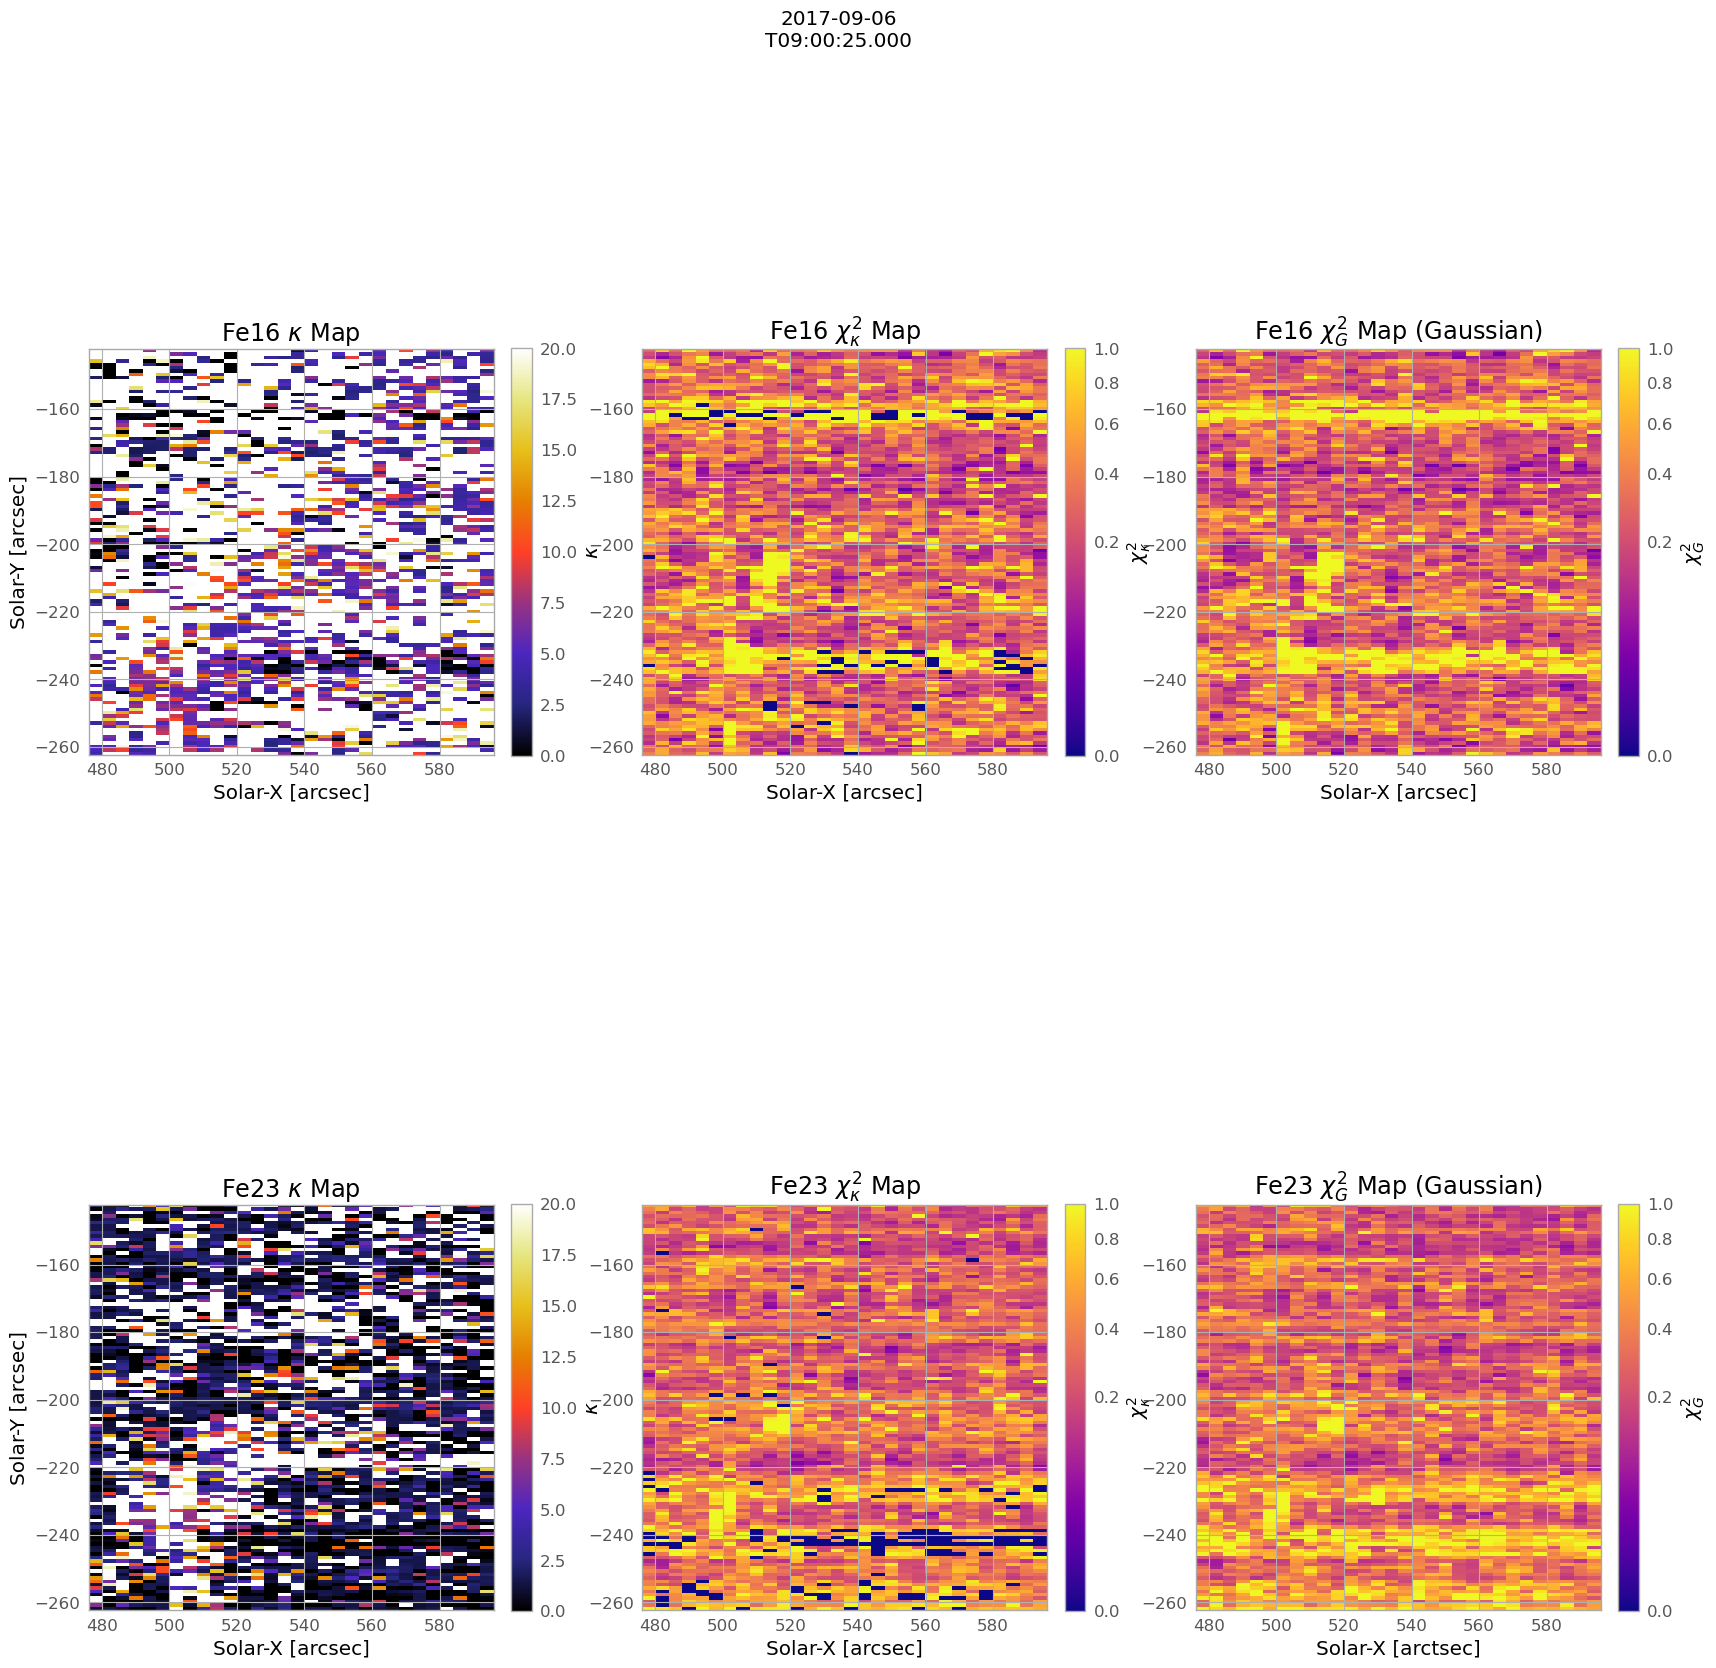

In [19]:
####Testing Other Imarrays####

# #interactive plotting in separate window
# %matplotlib qt

# #normal charts inside notebooks
# %matplotlib inline


fig = plt.figure(figsize=[20,20])
    
plt.suptitle(gauss_cutout1.meta['mod_index']['date_obs'][0:10] + '\n' +gauss_cutout1.meta['mod_index']['date_obs'][10:])
    
plot_grid = fig.add_gridspec(nrows=2, ncols=3, hspace=0.25, wspace=0.25)
    
####FE16 KAPPA####
subplt = fig.add_subplot(plot_grid[0,0])
subplt.set_xlabel('Solar-X [arcsec]')
subplt.set_ylabel('Solar-Y [arcsec]')


#     print(fit_res1.fit['params'][iy, ix][4])


# #slice the 3d array to select the last value (kappa) from each sub-array
#     print(fit_res1.fit['params'][:,:,-1][iy,ix])

subplt.set_title('Fe16 $\kappa$ Map')
subplt.imshow(fit_res1.fit['params'][:,:,-1], origin='lower', extent = raster_cutout1.meta['extent_arcsec'], cmap = 'CMRmap', vmax = 20, vmin = 0.0)
pos = subplt.imshow(fit_res1.fit['params'][:,:,-1], origin='lower', extent = raster_cutout1.meta['extent_arcsec'], cmap = 'CMRmap', vmax = 20, vmin = 0.0)

fig.colorbar(pos,fraction=0.046, pad=0.04, label = "$\kappa$")

####FE23 KAPPA#####
subplt = fig.add_subplot(plot_grid[1,0])
subplt.set_xlabel('Solar-X [arcsec]')
subplt.set_ylabel('Solar-Y [arcsec]')

subplt.set_title('Fe23 $\kappa$ Map')
subplt.imshow(fit_res2.fit['params'][:,:,-1], origin='lower', extent = raster_cutout2.meta['extent_arcsec'], cmap = 'CMRmap', vmax = 20, vmin = 0.0)
pos = subplt.imshow(fit_res2.fit['params'][:,:,-1], origin='lower', extent = raster_cutout2.meta['extent_arcsec'], cmap = 'CMRmap', vmax = 20, vmin = 0.0)

fig.colorbar(pos,fraction=0.046, pad=0.04, label = "$\kappa$")


####FE16 Kappa CHI2####

subplt = fig.add_subplot(plot_grid[0,1])
subplt.set_xlabel('Solar-X [arcsec]')

subplt.set_title('Fe16' + ' ' + r'$\chi_{\kappa}^{2}$' + ' ' +'Map')
subplt.imshow(fit_res1.fit['chi2'], norm=colors.PowerNorm(gamma=0.4, vmax=1, vmin=0), origin='lower', extent = raster_cutout1.meta['extent_arcsec'], cmap = 'plasma')
pos = subplt.imshow(fit_res1.fit['chi2'], norm=colors.PowerNorm(gamma=0.4, vmax=1, vmin=0), origin='lower', extent = raster_cutout1.meta['extent_arcsec'], cmap = 'plasma')

fig.colorbar(pos,fraction=0.046, pad=0.04, label = r'$\chi_{\kappa}^{2}$')


####FE23 Kappa CHI2####
subplt = fig.add_subplot(plot_grid[1,1])
subplt.set_xlabel('Solar-X [arcsec]')

subplt.set_title('Fe23' + ' ' + r'$\chi_{\kappa}^{2}$' + ' ' +'Map' )
subplt.imshow(fit_res2.fit['chi2'], norm=colors.PowerNorm(gamma=0.4, vmax=1, vmin=0), origin='lower', extent = raster_cutout2.meta['extent_arcsec'], cmap = 'plasma')
pos = subplt.imshow(fit_res2.fit['chi2'], norm=colors.PowerNorm(gamma=0.4, vmax=1, vmin=0), origin='lower', extent = raster_cutout2.meta['extent_arcsec'], cmap = 'plasma')

fig.colorbar(pos,fraction=0.046, pad=0.04, label = r'$\chi_{\kappa}^{2}$')



####FE16 Gauss CHI2####

subplt = fig.add_subplot(plot_grid[0,2])
subplt.set_xlabel('Solar-X [arcsec]')

subplt.set_title('Fe16' + ' ' + r'$\chi_{G}^{2}$' + ' ' +'Map (Gaussian)')
subplt.imshow(fit_gauss1.fit['chi2'], norm=colors.PowerNorm(gamma=0.4, vmax=1, vmin=0), origin='lower', extent = raster_cutout1.meta['extent_arcsec'], cmap = 'plasma')
pos = subplt.imshow(fit_gauss1.fit['chi2'], norm=colors.PowerNorm(gamma=0.4, vmax=1, vmin=0), origin='lower', extent = raster_cutout1.meta['extent_arcsec'], cmap = 'plasma')

fig.colorbar(pos,fraction=0.046, pad=0.04, label = r'$\chi_{G}^{2}$')


####FE23 Gauss CHI2####
subplt = fig.add_subplot(plot_grid[1,2])
subplt.set_xlabel('Solar-X [arctsec]')

subplt.set_title('Fe23' + ' ' + r'$\chi_{G}^{2}$' + ' ' +'Map (Gaussian)' )
subplt.imshow(fit_gauss2.fit['chi2'], norm=colors.PowerNorm(gamma=0.4, vmax=1, vmin=0), origin='lower', extent = raster_cutout2.meta['extent_arcsec'], cmap = 'plasma')
pos = subplt.imshow(fit_gauss2.fit['chi2'], norm=colors.PowerNorm(gamma=0.4, vmax=1, vmin=0), origin='lower', extent = raster_cutout2.meta['extent_arcsec'], cmap = 'plasma')

fig.colorbar(pos,fraction=0.046, pad=0.04, label = r'$\chi_{G}^{2}$')



# plt.savefig('SaveTest')

plt.show()


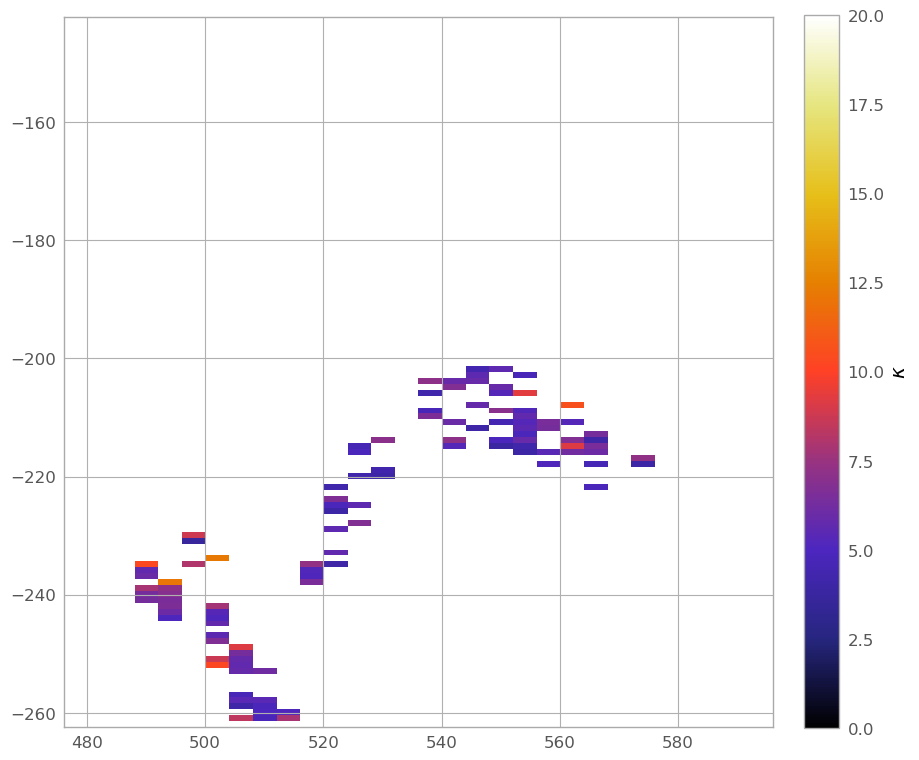

In [20]:
fig = plt.figure(figsize=[10,10])

plt.imshow(kap_filt1, origin='lower', extent = raster_cutout1.meta['extent_arcsec'], cmap = 'CMRmap', vmax = 20, vmin = 0.0)


pos = plt.imshow(kap_filt1, origin='lower', extent = raster_cutout2.meta['extent_arcsec'], cmap = 'CMRmap', vmax = 20, vmin = 0.0)

fig.colorbar(pos,fraction=0.046, pad=0.04, label = "$\kappa$")


plt.show()


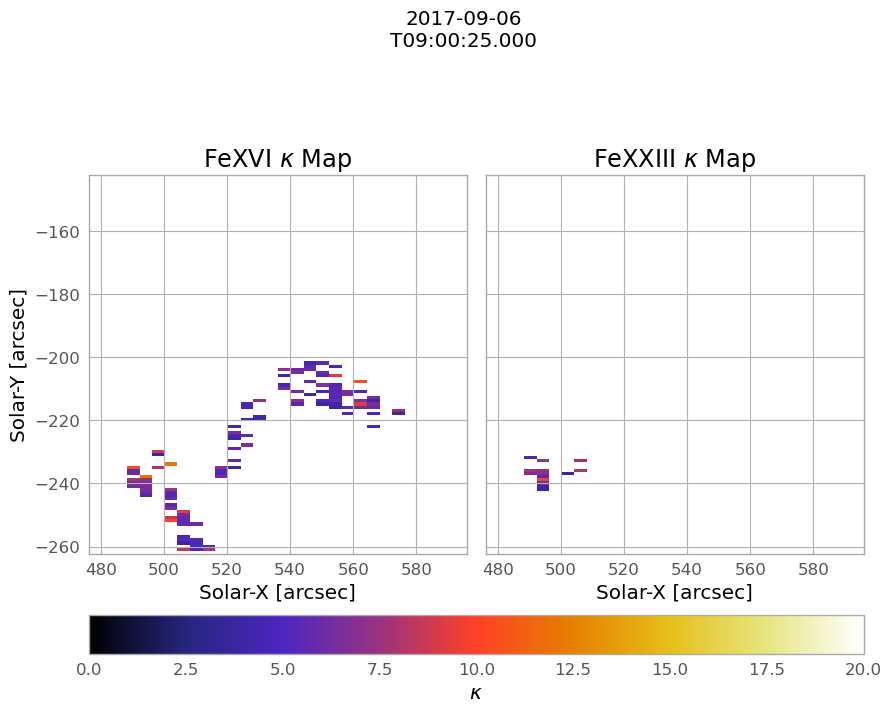

In [21]:
# fig = plt.figure(figsize=[10,8])
    
# plt.suptitle(gauss_cutout1.meta['mod_index']['date_obs'][0:10] + '\n' +gauss_cutout1.meta['mod_index']['date_obs'][10:])
    
# plot_grid = fig.add_gridspec(nrows=1, ncols=2, wspace=0.05)
    
# ####FE16 KAPPA####
# subplt = fig.add_subplot(plot_grid[0,0])
# subplt.set_xlabel('Solar-X [arcsec]')
# subplt.set_ylabel('Solar-Y [arcsec]')

# subplt.set_title('Fe16 $\kappa$ Map')
# subplt.imshow(kap_filt1, origin='lower', extent = raster_cutout1.meta['extent_arcsec'], cmap = 'CMRmap', vmax = 20, vmin = 0.0)
# pos1 = subplt.imshow(kap_filt1, origin='lower', extent = raster_cutout1.meta['extent_arcsec'], cmap = 'CMRmap', vmax = 20, vmin = 0.0)

# fig.colorbar(pos1, orientation = 'horizontal', fraction=0.046, pad=0.1, label = "$\kappa$")

# ####FE23 KAPPA#####
# subplt = fig.add_subplot(plot_grid[0,1])
# subplt.set_xlabel('Solar-X [arcsec]')

# subplt.set_title('Fe23 $\kappa$ Map')
# subplt.imshow(kap_filt2, origin='lower', extent = raster_cutout2.meta['extent_arcsec'], cmap = 'CMRmap', vmax = 20, vmin = 0.0)
# pos2 = subplt.imshow(kap_filt2, origin='lower', extent = raster_cutout2.meta['extent_arcsec'], cmap = 'CMRmap', vmax = 20, vmin = 0.0)

# fig.colorbar(pos2,orientation = 'horizontal', fraction=0.046, pad=0.1,label = "$\kappa$")

# plt.setp(subplt.get_yticklabels(), visible=False)
# # plt.colorbar(pos1, orientation= 'horizontal')


fig, (ax1, ax2) = plt.subplots(1,2, figsize=[10,8]) 
plt.suptitle(gauss_cutout1.meta['mod_index']['date_obs'][0:10] + '\n' +gauss_cutout1.meta['mod_index']['date_obs'][10:])
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.05, hspace=None)
# plot_grid = fig.add_gridspec(nrows=1, ncols=2, wspace=0.4)
    
####FE16 KAPPA####
# subplt = fig.add_subplot(plot_grid[0,0])
ax1.set_xlabel('Solar-X [arcsec]')
ax1.set_ylabel('Solar-Y [arcsec]')

ax1.set_title('FeXVI $\kappa$ Map')
fe16kappa = ax1.imshow(kap_filt1, origin='lower', extent = raster_cutout1.meta['extent_arcsec'], cmap = 'CMRmap', vmax = 20, vmin = 0.0)
# pos1 = subplt.imshow(inten_map1.data, norm=colors.PowerNorm(gamma=0.4, vmax  = 250000, vmin = 0) , origin='lower', extent = gauss_cutout1.meta['extent_arcsec'], cmap='PuBu_r')

# fig.colorbar(pos1, fraction=0.046, pad=0.05,label = "Intensity", format='%.0e')

####FE23 KAPPA#####

ax2.set_xlabel('Solar-X [arcsec]')
# ax2.set_ylabel('Solar-Y [arcsec]')

ax2.set_title('FeXXIII $\kappa$ Map')
ax2.imshow(kap_filt2, origin='lower', extent = raster_cutout2.meta['extent_arcsec'], cmap = 'CMRmap', vmax = 20, vmin = 0.0)
# subplt = fig.add_subplot(plot_grid[0,1])
# subplt.set_xlabel('Solar-X [arcsec]')

# subplt.set_title('Fe23 $\kappa$ Map')
# subplt.imshow(inten_map2.data, norm=colors.PowerNorm(gamma=0.4, vmax  = 250000, vmin = 0) , origin='lower', extent = gauss_cutout2.meta['extent_arcsec'], cmap='PuBu_r')
# pos2 = subplt.imshow(inten_map2.data, norm=colors.PowerNorm(gamma=0.4, vmax  = 250000, vmin = 0) , origin='lower', extent = gauss_cutout2.meta['extent_arcsec'], cmap='PuBu_r')

cbar = fig.colorbar(fe16kappa, ax=(ax1,ax2), orientation= 'horizontal', fraction=0.146, pad=0.1,label = "$\kappa$")

plt.setp(ax2.get_yticklabels(), visible=False)
# plt.colorbar(pos1, orientation= 'horizontal')

# plt.show()


plt.show()

CREATING KAPPA INTENSITY OVERLAY

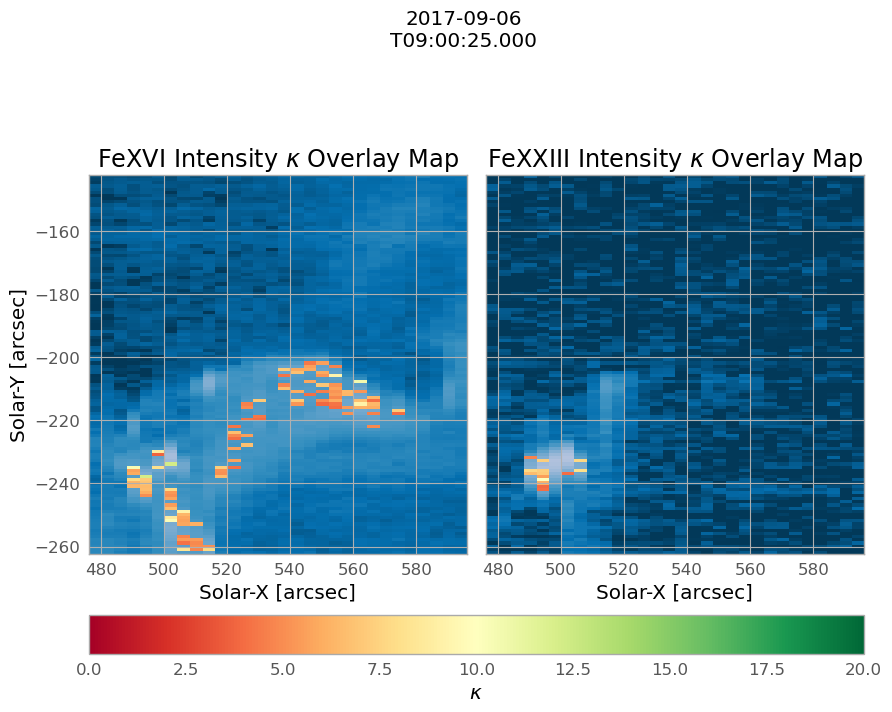

In [22]:

from numpy.ma import masked_array







flat_kapfilt1, flat_kapfilt2 = np.ravel(kap_filt1), np.ravel(kap_filt2)

flat_inten1filt, flat_inten2filt = np.where(flat_inten1 <= 20, 21, flat_inten1), np.where(flat_inten2 <= 20, 21, flat_inten2) 

kapoverlay1 = np.resize(np.where(flat_kapfilt1 > 20, flat_inten1filt, flat_kapfilt1), fit_res1.fit['params'][:,:,-1].shape)
kapoverlay2 = np.resize(np.where(flat_kapfilt2 > 20, flat_inten2filt, flat_kapfilt2), fit_res2.fit['params'][:,:,-1].shape)

intenmask1 = masked_array(kapoverlay1, kapoverlay1 <= 20)
kapmask1 = masked_array(kapoverlay1, kapoverlay1 > 20)

intenmask2 = masked_array(kapoverlay2, kapoverlay2 <= 20)
kapmask2 = masked_array(kapoverlay2, kapoverlay2 > 20)


# fig = plt.figure(figsize=[20,20])
    
# plt.suptitle(gauss_cutout1.meta['mod_index']['date_obs'][0:10] + '\n' +gauss_cutout1.meta['mod_index']['date_obs'][10:])
    
# plot_grid = fig.add_gridspec(nrows=1, ncols=2, wspace=0.25)
    
# ####FE16 KAPPA####
# subplt = fig.add_subplot(plot_grid[0,0])

# subplt.set_xlabel('Solar-X [arcsec]')
# subplt.set_ylabel('Solar-Y [arcsec]')

# subplt.set_title('Fe16 Intensity $\kappa$ Overlay Map')

# intenmap1 = subplt.imshow(intenmask1, norm=colors.LogNorm(vmax  = 250000) , origin='lower', extent = gauss_cutout1.meta['extent_arcsec'], cmap='PuBu_r')
# kapmap1 = subplt.imshow(kapmask1, origin='lower', extent = raster_cutout1.meta['extent_arcsec'], cmap = 'RdYlGn', vmax = 20, vmin = 0.0)
# pos = kapmap1

# fig.colorbar(pos,fraction=0.046, pad=0.04, label = "$\kappa$")


# ####FE23 KAPPA####
# subplt = fig.add_subplot(plot_grid[0,1])


# subplt.set_xlabel('Solar-X [arcsec]')
# # subplt.set_ylabel('Solar-Y [arcsec]')

# subplt.set_title('Fe23 Intensity $\kappa$ Overlay Map')
# intenmap2 = subplt.imshow(intenmask2, norm=colors.LogNorm(vmax  = 250000) , origin='lower', extent = gauss_cutout2.meta['extent_arcsec'], cmap='PuBu_r')
# kapmap2 = subplt.imshow(kapmask2, origin='lower', extent = raster_cutout2.meta['extent_arcsec'], cmap = 'RdYlGn', vmax = 20, vmin = 0.0)
# pos = kapmap2

# fig.colorbar(pos,fraction=0.046, pad=0.04, label = "$\kappa$")



fig, (ax1, ax2) = plt.subplots(1,2, figsize=[10,8]) 
plt.suptitle(gauss_cutout1.meta['mod_index']['date_obs'][0:10] + '\n' +gauss_cutout1.meta['mod_index']['date_obs'][10:])
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.05, hspace=None)
# plot_grid = fig.add_gridspec(nrows=1, ncols=2, wspace=0.4)
    
####FE16 KAPPA####
# subplt = fig.add_subplot(plot_grid[0,0])
ax1.set_xlabel('Solar-X [arcsec]')
ax1.set_ylabel('Solar-Y [arcsec]')

ax1.set_title('FeXVI Intensity $\kappa$ Overlay Map')
intenmap1 = ax1.imshow(intenmask1, norm=colors.LogNorm(vmax  = 250000) , origin='lower', extent = gauss_cutout1.meta['extent_arcsec'], cmap='PuBu_r')
kapmap1 = ax1.imshow(kapmask1, origin='lower', extent = raster_cutout1.meta['extent_arcsec'], cmap = 'RdYlGn', vmax = 20, vmin = 0.0)
# pos1 = subplt.imshow(inten_map1.data, norm=colors.PowerNorm(gamma=0.4, vmax  = 250000, vmin = 0) , origin='lower', extent = gauss_cutout1.meta['extent_arcsec'], cmap='PuBu_r')

# fig.colorbar(pos1, fraction=0.046, pad=0.05,label = "Intensity", format='%.0e')

####FE23 KAPPA#####

ax2.set_xlabel('Solar-X [arcsec]')
# ax2.set_ylabel('Solar-Y [arcsec]')

ax2.set_title('FeXXIII Intensity $\kappa$ Overlay Map')
intenmap1 = ax2.imshow(intenmask2, norm=colors.LogNorm(vmax  = 250000) , origin='lower', extent = gauss_cutout2.meta['extent_arcsec'], cmap='PuBu_r')
kapmap1 = ax2.imshow(kapmask2, origin='lower', extent = raster_cutout2.meta['extent_arcsec'], cmap = 'RdYlGn', vmax = 20, vmin = 0.0)
# subplt = fig.add_subplot(plot_grid[0,1])
# subplt.set_xlabel('Solar-X [arcsec]')

# subplt.set_title('Fe23 $\kappa$ Map')
# subplt.imshow(inten_map2.data, norm=colors.PowerNorm(gamma=0.4, vmax  = 250000, vmin = 0) , origin='lower', extent = gauss_cutout2.meta['extent_arcsec'], cmap='PuBu_r')
# pos2 = subplt.imshow(inten_map2.data, norm=colors.PowerNorm(gamma=0.4, vmax  = 250000, vmin = 0) , origin='lower', extent = gauss_cutout2.meta['extent_arcsec'], cmap='PuBu_r')

cbar = fig.colorbar(kapmap1, ax=(ax1,ax2), orientation= 'horizontal', fraction=0.146, pad=0.1,label = "$\kappa$")

plt.setp(ax2.get_yticklabels(), visible=False)
# plt.colorbar(pos1, orientation= 'horizontal')

# plt.show()


plt.show()


In [23]:


a = np.histogram(flat_inten1, bins = 500)

print(a)

print(flat_inten1)

# fig = plt.figure(figsize=[20,20])

# plt.hist(flat_inten1,bins = 1000)

# plt.show()

(array([ 16,  78, 115, 164, 186, 182, 152, 130, 148, 133, 134, 140, 123,
       133,  87,  81,  72,  64,  66,  61,  42,  45,  48,  51,  51,  41,
        30,  28,  40,  47,  32,  40,  23,  21,  20,  19,  23,  10,  11,
        14,  10,  19,  17,  14,  16,  12,  15,  11,  11,  11,  19,  18,
        11,  11,  19,  12,  10,  12,  17,  16,  20,  12,  11,  16,  13,
        14,   7,  12,  15,  11,  10,  13,  15,   9,   6,   5,  10,  11,
         7,   8,   8,   4,   5,   8,   8,   3,   4,   6,   1,   2,   8,
         7,   3,   5,   3,   3,   4,   2,   5,   1,   2,   1,   2,   2,
         2,   1,   1,   0,   1,   0,   4,   4,   4,   1,   2,   4,   1,
         5,   3,   0,   1,   2,   0,   1,   2,   0,   2,   0,   3,   1,
         2,   1,   0,   1,   0,   0,   3,   1,   2,   2,   2,   1,   1,
         2,   1,   0,   2,   0,   1,   0,   0,   0,   0,   1,   1,   0,
         1,   0,   0,   2,   0,   0,   1,   0,   2,   1,   0,   0,   0,
         1,   0,   0,   0,   0,   1,   0,   1,   0,   0,   0,  

INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]


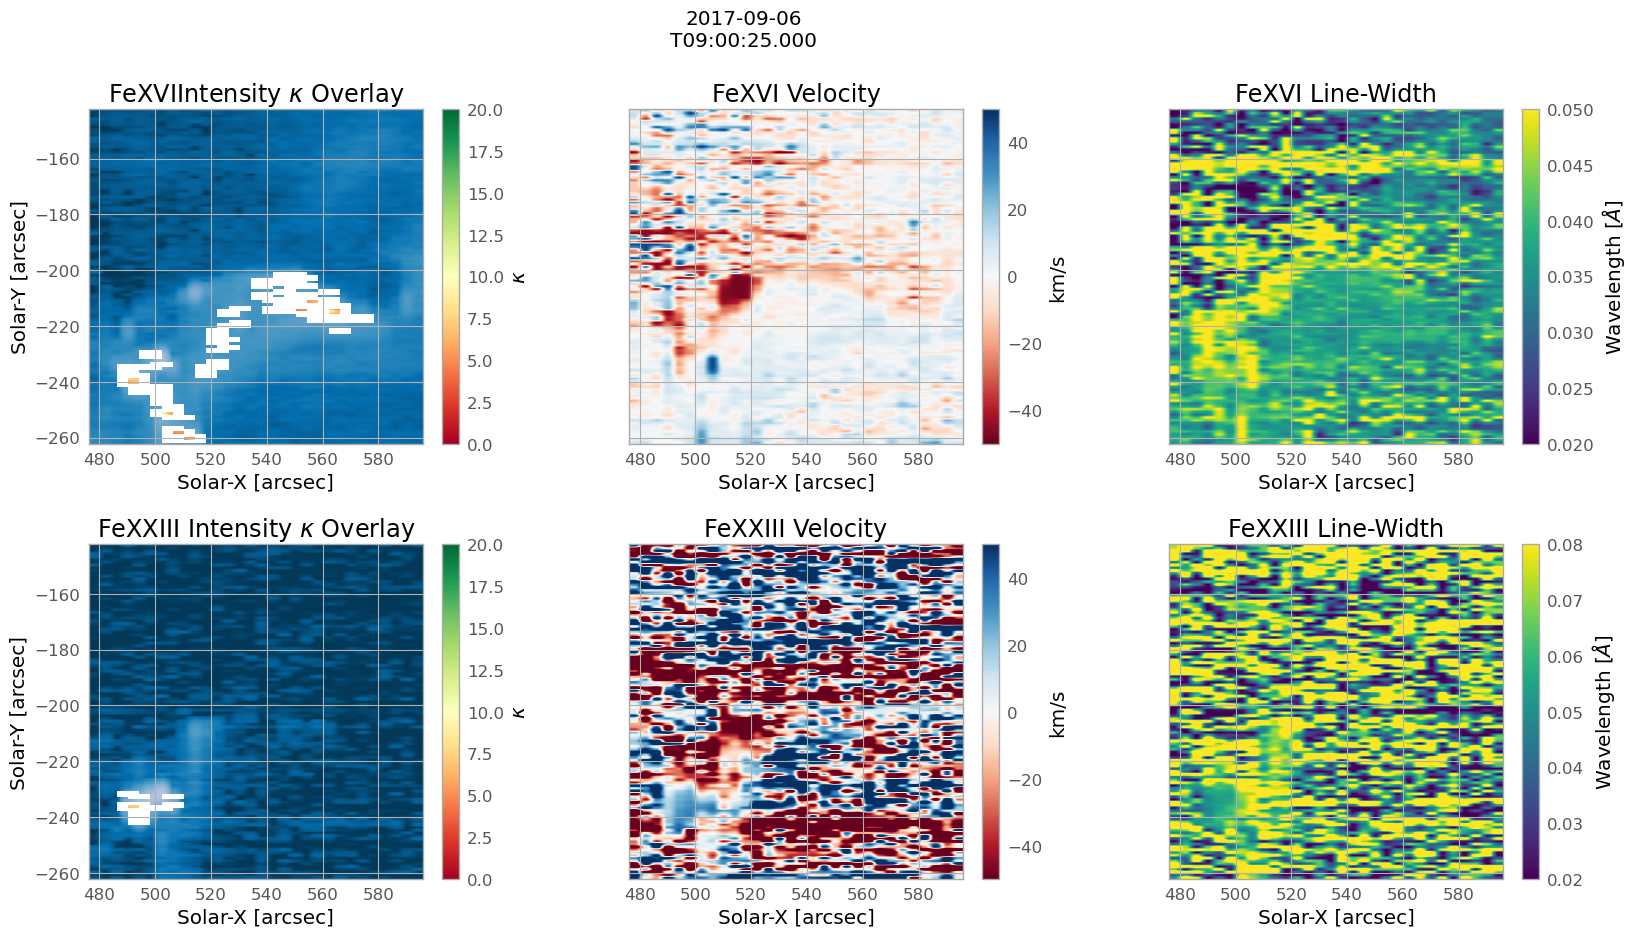

In [24]:

    
    #####Figure window for intensity kappa overlay, vel, width#####

    fig = plt.figure(figsize=[20,10])
    plot_grid = fig.add_gridspec(nrows=2, ncols=3, wspace=0.15, hspace = 0.3)
    plt.suptitle(gauss_cutout1.meta['mod_index']['date_obs'][0:10] + '\n' +gauss_cutout1.meta['mod_index']['date_obs'][10:])


    #Subplots for Fe16
    data_subplt = fig.add_subplot(plot_grid[0,0])
    data_subplt.set_title('FeXVIIntensity $\kappa$ Overlay')
    #sunpy measurement map can be used in matplotlib subplt using .imshow by including .data at the end of our maps (e.g inten_map.data)
    intenmap1 = data_subplt.imshow(intenmask1, norm=colors.LogNorm(vmax  = 250000) , origin='lower', extent = gauss_cutout1.meta['extent_arcsec'], cmap='PuBu_r')
    kapmap1 = data_subplt.imshow(kapmask1, origin='lower', extent = raster_cutout1.meta['extent_arcsec'], cmap = 'RdYlGn', vmax = 20, vmin = 0.0)
    #define position for subplt colourbar
    pos1 = kapmap1

    fig.colorbar(pos1,fraction=0.046, pad=0.04, label = "$\kappa$")
    data_subplt.set_xlabel('Solar-X [arcsec]')
    data_subplt.set_ylabel('Solar-Y [arcsec]')
    
    data_subplt = fig.add_subplot(plot_grid[0,1])
    vel_map = fit_gauss1.get_map(component=0, measurement='vel')
    #sunpy measurement map can be used in matplotlib subplt using .imshow by including .data at the end of our maps (e.g inten_map.data)
    data_subplt.imshow(vel_map.data,origin='lower', extent = gauss_cutout1.meta['extent_arcsec'], cmap = 'RdBu', vmax = 50, vmin = -50)
    #define position for subplt colourbar
    pos2 = data_subplt.imshow(vel_map.data,origin='lower', extent = gauss_cutout1.meta['extent_arcsec'], cmap = 'RdBu', vmax = 50, vmin = -50)
    data_subplt.set_title('FeXVI Velocity')
    fig.colorbar(pos2, fraction=0.046, pad=0.04, label = 'km/s')
    plt.setp(data_subplt.get_yticklabels(), visible=False)
    data_subplt.set_xlabel('Solar-X [arcsec]')
    
    data_subplt = fig.add_subplot(plot_grid[0,2])
    width_map = fit_gauss1.get_map(component=0, measurement='width')
    #sunpy measurement map can be used in matplotlib subplt using .imshow by including .data at the end of our maps (e.g inten_map.data)
    data_subplt.imshow(width_map.data,origin='lower', extent = gauss_cutout1.meta['extent_arcsec'], cmap = 'viridis', vmax = 0.05, vmin = 0.02)
    #define position for subplt colourbar
    pos3 = data_subplt.imshow(width_map.data,origin='lower', extent = gauss_cutout1.meta['extent_arcsec'], cmap = 'viridis', vmax = 0.05, vmin = 0.02)
    data_subplt.set_title('FeXVI Line-Width')
    fig.colorbar(pos3,fraction=0.046, pad=0.04, label = 'Wavelength [$\AA$]')
    plt.setp(data_subplt.get_yticklabels(), visible=False)
    data_subplt.set_xlabel('Solar-X [arcsec]')



    #Subplots for Fe23

    data_subplt = fig.add_subplot(plot_grid[1,0])
    data_subplt.set_title('FeXXIII Intensity $\kappa$ Overlay')
    intenmap2 = data_subplt.imshow(intenmask2, norm=colors.LogNorm(vmax  = 250000) , origin='lower', extent = gauss_cutout1.meta['extent_arcsec'], cmap='PuBu_r')
    kapmap2 = data_subplt.imshow(kapmask2, origin='lower', extent = raster_cutout1.meta['extent_arcsec'], cmap = 'RdYlGn', vmax = 20, vmin = 0.0)
    pos4 = kapmap2

    fig.colorbar(pos4,fraction=0.046, pad=0.04, label = "$\kappa$")

    data_subplt.set_xlabel('Solar-X [arcsec]')
    data_subplt.set_ylabel('Solar-Y [arcsec]')
    
    data_subplt = fig.add_subplot(plot_grid[1,1])
    vel_map = fit_gauss2.get_map(component=0, measurement='vel')
    #sunpy measurement map can be used in matplotlib subplt using .imshow by including .data at the end of our maps (e.g inten_map.data)
    data_subplt.imshow(vel_map.data,origin='lower', extent = gauss_cutout2.meta['extent_arcsec'], cmap = 'RdBu', vmax = 50, vmin = -50)
    #define position for subplt colourbar
    pos5 = data_subplt.imshow(vel_map.data,origin='lower', extent = gauss_cutout2.meta['extent_arcsec'], cmap = 'RdBu', vmax = 50, vmin = -50)
    data_subplt.set_title('FeXXIII Velocity')
    fig.colorbar(pos5, fraction=0.046, pad=0.04, label = 'km/s')
    plt.setp(data_subplt.get_yticklabels(), visible=False)
    data_subplt.set_xlabel('Solar-X [arcsec]')
    
    data_subplt = fig.add_subplot(plot_grid[1,2])
    width_map = fit_gauss2.get_map(component=0, measurement='width')
    #sunpy measurement map can be used in matplotlib subplt using .imshow by including .data at the end of our maps (e.g inten_map.data)
    data_subplt.imshow(width_map.data,origin='lower', extent = gauss_cutout2.meta['extent_arcsec'], cmap = 'viridis', vmax = 0.08, vmin = 0.02)
    #define position for subplt colourbar
    pos6 = data_subplt.imshow(width_map.data,origin='lower', extent = gauss_cutout2.meta['extent_arcsec'], cmap = 'viridis', vmax = 0.08, vmin = 0.02)
    data_subplt.set_title('FeXXIII Line-Width')
    fig.colorbar(pos6,fraction=0.046, pad=0.04, label = 'Wavelength [$\AA$]')
    plt.setp(data_subplt.get_yticklabels(), visible=False)

    data_subplt.set_xlabel('Solar-X [arcsec]')
    plt.savefig('koverlay_vel_width/'+gauss_cutout1.meta['mod_index']['date_obs'][11:19].replace(':',''))

    plt.show()

